# Cybersecurity Data Science Project

**Course Name:** Using Data Science Methods in Cybersecurity  
**Instructor:** Uri Itai  
**Student Name:** Omar El- Sheikh   

This code presents an end-to-end data science pipeline applied to a phishing URL classification dataset from Kaggle. The goal is to analyze, process, and model the data to detect malicious (phishing) URLs based on their structural characteristics.






# Dataset Overview

The dataset used in this notebook contains labeled website URLs that are either **malicious (phishing)** or **legitimate (safe)**. It is sourced from Kaggle and is suitable for binary classification tasks.

## Columns Description:

- **URL**:  
  A full website address (string), which is the input feature for this analysis.  
  These URLs may contain suspicious patterns, keywords (e.g., `login`, `cgi-bin`, `paypal`), or unusual structures often used in phishing attacks.

- **Label**:  
  The target class indicating whether the URL is phishing or not.  
  - `'bad'` → The URL is phishing (malicious)  
  - `'good'` → The URL is legitimate (safe)

## Summary:

- Total number of records: 549,346  
- Unique URLs: 507,195
- The dataset contains duplicate URLs – around 7.7% of the rows are repeated.
- Classes are binary: `'bad'` (phishing), `'good'` (legitimate)  
- The dataset is **unbalanced** – phishing URLs are more frequent than legitimate ones.

In this project, we will extract structural features from the URLs and apply machine learning methods to classify them accurately.

# Loading the Dataset

In [ ]:
# Step 1: Upload the Kaggle API key file (kaggle.json) from your local machine
from google.colab import files
uploaded = files.upload()  # Select kaggle.json from your Downloads folder

# Step 2: Move the uploaded kaggle.json file to the right location
# This allows the kaggle CLI tool to authenticate with your account
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download the dataset using the Kaggle CLI
# Dataset: Phishing Site URLs by taruntiwarihp
!kaggle datasets download -d taruntiwarihp/phishing-site-urls

# Step 4: Unzip the downloaded file to extract the CSV
!unzip -o phishing-site-urls.zip

# Step 5: Load the CSV into a pandas DataFrame and display the first few rows
import pandas as pd

df = pd.read_csv("phishing_site_urls.csv")
display(df.head())

# Step 6: Install tldextract
!pip install tldextract

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls
License(s): DbCL-1.0
phishing-site-urls.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  phishing-site-urls.zip
  inflating: phishing_site_urls.csv  


,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [ ]:
# Display shape and first rows
print(f"Dataset shape: {df.shape}")
df.head()

# Display info about columns and data types
df.info()

# Count of each label
print(df['Label'].value_counts())

Dataset shape: (549346, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB
Label
good    392924
bad     156422
Name: count, dtype: int64


# System stage


This section analyzes basic file-level and web-level properties of the dataset, such as file name, size, type, source, and context. Although the dataset is loaded via Kaggle's API in Colab (not from a local system), we still examine key properties to comply with the pipeline structure.

Even though the dataset is loaded directly via the Kaggle API, we analyze file properties for documentation purposes.

In [ ]:
from pathlib import Path

# Get file path
file_path = Path("phishing_site_urls.csv")

# Print file name
print("File Name:", file_path.name)

# Print file size in MB
print("File Size (MB):", round(file_path.stat().st_size / (1024 * 1024), 2))

# Print file extension
print("File Extension:", file_path.suffix)


File Name: phishing_site_urls.csv
File Size (MB): 30.1
File Extension: .csv


---
###**Web Information**

**Source**: Kaggle ([Phishing Site URLs Dataset](https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls))  

**License**: [DBcl-1.0](https://opendatacommons.org/licenses/dbcl/1-0/)

**Last Updated**: 5 years ago (Tue Jul 21 2020)

**Expected Update Frequency**: Monthly

**Usability**: 10.00 (This score is calculated by Kaggle)

**Views**: 117K (at the time of initial release) - (3617 in the last 30 days)

**Downloads**: 15.7K (at the time of initial release) - (448 in the last 30 days)

**Description**:  
The dataset contains a labeled collection of URLs classified as either "good" (legitimate) or "bad" (phishing).  
  It is relevant for detecting malicious URLs using structural patterns and feature extraction, especially for cybersecurity-focused data science tasks.

---

###**Protocols**
Although the dataset is composed of URLs only, they often begin with protocols like `http` or `https`, which can indicate risk level.  
In this project, we extract whether each URL uses `https` as a binary feature (`is_https`).

---

###**Version Control**

This notebook can be tracked using Git version control.  
Each pipeline stage (loading, cleaning, feature extraction, modeling) can be saved as a commit for audit and reproducibility purposes.

---

#Data Governance
This section addresses the fundamental governance questions about the dataset, ensuring transparency, traceability, and contextual understanding of its origin and purpose.

### - Who created the dataset?
- The dataset **"Phishing Site URLs"** was created and published by **Tarun Tiwari**, a Senior Machine Learning Engineer from Bengaluru, India.  
He is a verified Datasets Expert on Kaggle.  
*Kaggle Profile: [https://www.kaggle.com/taruntiwarihp](https://www.kaggle.com/taruntiwarihp)

### - When was the dataset created?
- The dataset was uploaded approximately **5 years ago**, based on the metadata shown on Kaggle.

### - Where is the dataset hosted?
- The dataset is publicly available and hosted on **Kaggle**:  
  [Phishing Site URLs – Kaggle Dataset Link](https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls)

### - Why was the dataset created?
The dataset was created to help **cybersecurity researchers and data scientists** build models capable of detecting phishing attacks based on URL patterns.  
It enables:
- Training machine learning models for phishing detection  
- Studying structural characteristics of malicious URLs  
- Improving security tools like spam filters, browser extensions, and firewalls

# Meta Data




In this section, we analyze the dataset structure and content before building any models. Proper metadata understanding ensures data integrity and reliability.

---

###Handling Label Conflicts

As part of the metadata validation process, we automatically searched for **conflicting labels** — cases where the **same URL appears with both 'good' and 'bad' labels**.

We found one such case:
- URL: `tommyhumphreys.com/` appeared **3 times**:
  - 2 labeled as `'bad'`
  - 1 labeled as `'good'`

As this majority clearly indicates `'bad'`, and to ensure **label consistency**, we **automatically removed only the 'good' entry** for this URL and preserved the `'bad'` instances.

This decision was made through programmatic inspection, avoiding manual bias, and ensuring the integrity of the training data.

In [ ]:
import pandas as pd

# Count total and unique before cleaning
print("Total records (before):", df.shape[0])
print("Unique URLs (before):", df['URL'].nunique())

# Step 1: Identify conflicting URLs (appear with more than one label)
conflicting_labels = df.groupby('URL')['Label'].nunique()
conflict_urls = conflicting_labels[conflicting_labels > 1].index

print("\nConflicting URLs:")
print(conflict_urls.tolist())

# Step 2: Show label distribution for each conflicting URL
print("\nLabel counts for conflicting URLs:")
for url in conflict_urls:
    label_counts = df[df['URL'] == url]['Label'].value_counts()
    print(f"{url} →")
    print(label_counts.to_string())
    print("")

# Step 3: Remove only the 'good' labels from conflicting URLs
df = df[~((df['URL'].isin(conflict_urls)) & (df['Label'] == 'good'))]

# Step 4: Drop exact duplicates (same URL + label)
df = df.drop_duplicates()

# Step 5: Recalculate metadata
print("\nAfter selective cleaning:")
print("Total records (after):", df.shape[0])
print("Unique URLs (after):", df['URL'].nunique())

# Step 6: Check data types
print("\nData types:")
print(df.dtypes)

# Step 7: Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Total records (before): 549346
Unique URLs (before): 507195

Conflicting URLs:
['tommyhumphreys.com/']

Label counts for conflicting URLs:
tommyhumphreys.com/ →
Label
bad     2
good    1


After selective cleaning:
Total records (after): 507195
Unique URLs (after): 507195

Data types:
URL      object
Label    object
dtype: object

Missing values per column:
URL      0
Label    0
dtype: int64


## Metadata Summary

At this point, we completed the initial metadata inspection and cleaning phase.

- We verified the **data size** before and after cleaning.
- We handled a **label conflict** for one URL by removing the incorrect 'good' entry.
- We confirmed the **data types** of all columns (`object` type for both URL and Label).
- We checked for **missing values**, and found **none**.

The dataset is now clean and ready for feature engineering and modeling.


# Data Statistics





In this stage, we explore the statistical properties of our dataset to gain initial insights before feature engineering and modeling. This includes:

- Understanding the distribution of values
- Measuring central tendencies (mean, median, mode, etc.)
- Detecting outliers or anomalies
- Assessing potential correlations between variables

Since the original dataset contains only raw URL text and binary labels (`good` / `bad`), direct numerical analysis is not possible at this point. Therefore, we begin by engineering a simple yet meaningful numeric feature:

> **Feature:** `url_length` — the total number of characters in each URL

This feature allows us to perform basic statistical analysis and evaluate whether phishing URLs tend to have different structural lengths compared to legitimate ones.

**Note:**  
- This is an initial feature intended for early-stage exploration. In later stages of the pipeline, we will extract additional rich features (e.g., number of digits, special characters etc.) to support multivariate analysis and predictive modeling.

- Some data statistics steps, such as handling duplicates, missing values, and conflicting entries, were already covered in the Metadata stage. We now focus on numerical exploration using the `url_length` feature, including descriptive statistics and visual distribution analysis.

## Central Tendencies — `url_length`

To begin our numeric analysis, we created a new feature called `url_length`, representing the number of characters in each URL.

We then computed basic descriptive statistics:

- **Mean**: Average URL length across the dataset  
- **Median**: Middle value when sorted  
- **Mode**: Most frequent URL length  
- **Min/Max**: Shortest and longest URLs in terms of characters  
- **Standard Deviation**: How much variability exists in URL lengths

This gives us an initial understanding of the structural properties of phishing vs. legitimate URLs.

Next: We will **visualize the distribution** of this feature and analyze its relationship with the label (`good` / `bad`).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add a numeric feature: URL length
df['url_length'] = df['URL'].apply(len)

# Compute basic statistics
print("Descriptive statistics for `url_length`:\n")
print(f"Mean: {df['url_length'].mean():.2f}")
print(f"Median: {df['url_length'].median()}")
print(f"Mode: {df['url_length'].mode()[0]}")
print(f"Min: {df['url_length'].min()}")
print(f"Max: {df['url_length'].max()}")
print(f"Standard Deviation: {df['url_length'].std():.2f}")

Descriptive statistics for `url_length`:

Mean: 51.47
Median: 41.0
Mode: 31
Min: 1
Max: 2307
Standard Deviation: 42.85


### Visual Analysis of `url_length`

To complement the descriptive statistics, we visualized the distribution of URL lengths to better understand its structure and relationship with phishing behavior.




#### **1. Histogram of URL Lengths**
This histogram shows the frequency of URLs by length:


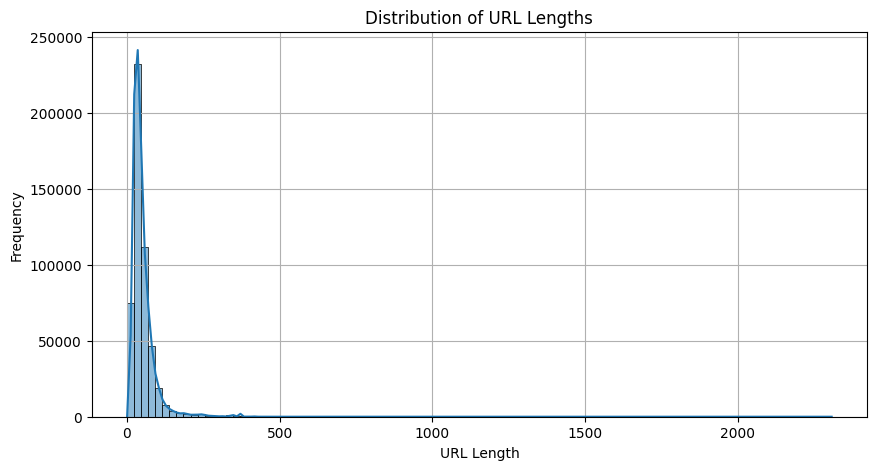

In [ ]:
# Histogram of URL lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['url_length'], bins=100, kde=True)
plt.title('Distribution of URL Lengths')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- Most URLs fall between **20 and 60 characters**.
- The distribution is **right-skewed**, with a long tail reaching up to 2307 characters.
- The presence of very long URLs could indicate obfuscation or malicious crafting.

#### **2. Boxplot of URL Lengths**
The boxplot highlights the variability and outliers:


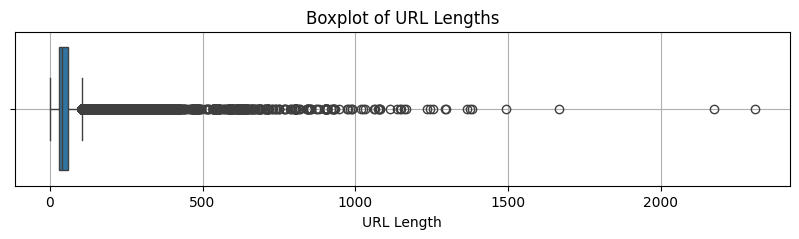

In [ ]:
# Boxplot of URL lengths
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['url_length'])
plt.title('Boxplot of URL Lengths')
plt.xlabel('URL Length')
plt.grid(True)
plt.show()

- Most URLs are tightly packed within a short range.
- Numerous **outliers** are visible far beyond the upper whisker, suggesting rare, extremely long URLs.
- These outliers may be significant, especially in phishing detection.

#### **3. KDE Plot by Label (`good` / `bad`)**
This density plot compares the `url_length` distribution by label:


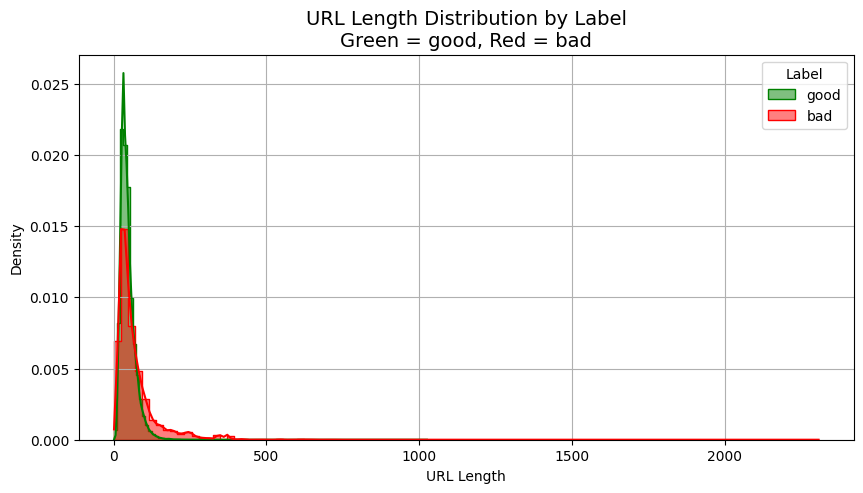

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

sns.histplot(data=df[df['Label'] == 'good'], x='url_length', bins=100, kde=True,
             stat='density', element='step', color='green', label='good')
sns.histplot(data=df[df['Label'] == 'bad'], x='url_length', bins=100, kde=True,
             stat='density', element='step', color='red', label='bad')

plt.title('URL Length Distribution by Label\nGreen = good, Red = bad', fontsize=14)
plt.xlabel('URL Length')
plt.ylabel('Density')
plt.legend(title='Label')
plt.grid(True)
plt.show()


- **Phishing URLs (`bad`) tend to have longer lengths** on average.  
  Attackers often use obfuscation techniques such as encoded characters, subdomains, and long query strings.

- **`bad` URLs show a wider and flatter distribution**, indicating **more variability** in their structure.

- **Legitimate (`good`) URLs are more concentrated** around shorter lengths (e.g., 30–50 characters), resulting in a sharper density peak.


###Removing Extreme Outliers

After plotting the initial **boxplot** and **distribution** of `url_length`, we noticed a few extremely long URLs — some exceeding **1500 characters**. While these are rare, their magnitude raised concerns about potential distortion in summary statistics and visualizations.

We decided to treat these cases as **outliers**, based on the following reasoning:

- The majority of URLs are well below 500 characters.
- A handful of URLs are **very far from the bulk of the data**, stretching up to **2300+ characters**.
- These extreme values might result from parsing errors, automated tracking URLs, or rare structural anomalies.

To ensure a cleaner and more informative analysis, we **removed all entries with `url_length` > 1500** and then re-evaluated the statistics and graphs.


In [ ]:
# Save the original version
df_original = df.copy()

# Filtering the OUTLIERS
df = df[df['url_length'] <= 1500]

#New statistics
mean_length = df['url_length'].mean()
median_length = df['url_length'].median()
mode_length = df['url_length'].mode()[0]
min_length = df['url_length'].min()
max_length = df['url_length'].max()
std_length = df['url_length'].std()

print("=== Updated Descriptive Statistics ===")
print(f"Mean: {mean_length:.2f}")
print(f"Median: {median_length}")
print(f"Mode: {mode_length}")
print(f"Min: {min_length}")
print(f"Max: {max_length}")
print(f"Standard Deviation: {std_length:.2f}")


=== Updated Descriptive Statistics ===
Mean: 51.46
Median: 41.0
Mode: 31
Min: 1
Max: 1492
Standard Deviation: 42.56


#### **1. Histogram of URL Lengths -  After filtering the OUTLIERS**

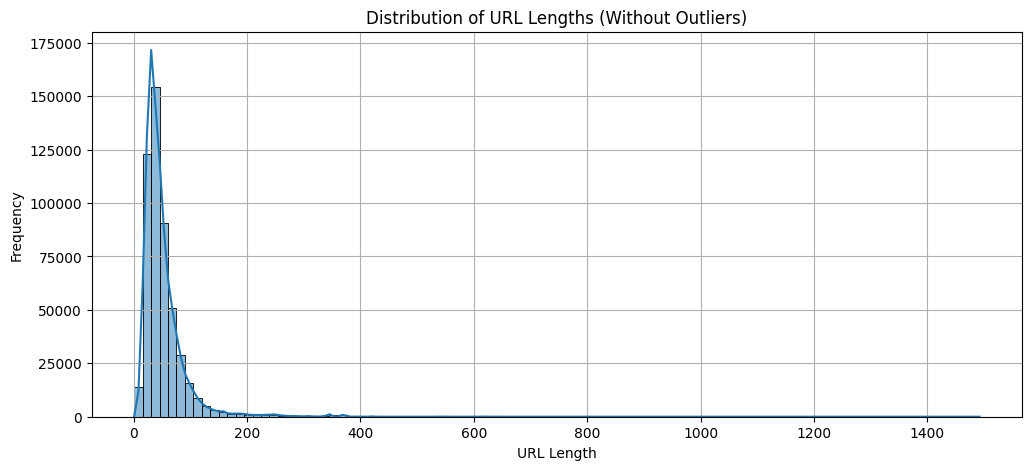

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(df['url_length'], bins=100, kde=True)
plt.title('Distribution of URL Lengths (Without Outliers)')
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### **2. Boxplot of URL Lengths -  After filtering the OUTLIERS**

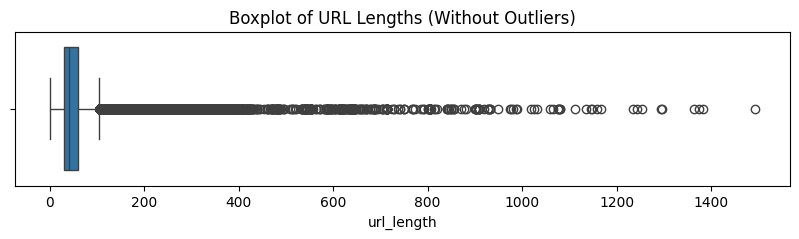

In [ ]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=df, x='url_length')
plt.title('Boxplot of URL Lengths (Without Outliers)')
plt.show()


#### **3. KDE Plot by Label (`good` / `bad`) -  After filtering the OUTLIERS**

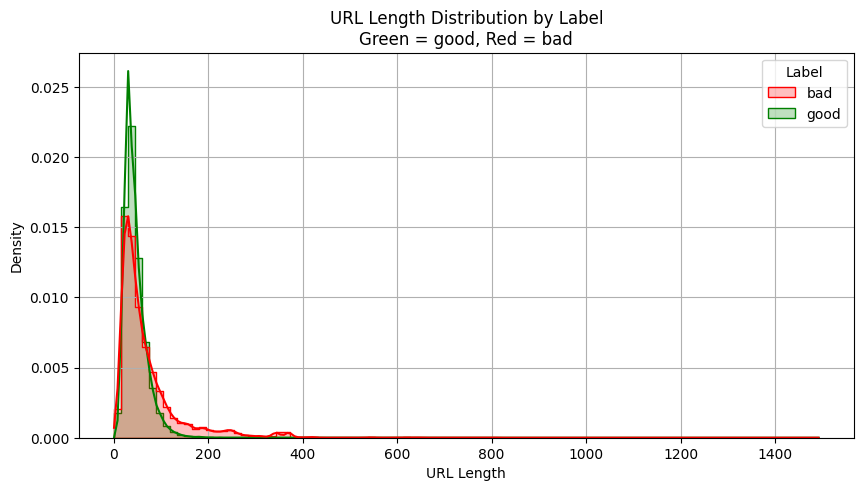

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='url_length', hue='Label', bins=100, kde=True,
             element='step', stat='density', common_norm=False,
             palette={'good': 'green', 'bad': 'red'})
plt.title('URL Length Distribution by Label\nGreen = good, Red = bad')
plt.xlabel('URL Length')
plt.ylabel('Density')
plt.grid(True)
plt.show()


| Metric                 | Before Outlier Removal | After Outlier Removal |
|------------------------|------------------------|------------------------|
| **Mean**               | 51.47                  | 51.46                  |
| **Median**             | 41.0                   | 41.0                   |
| **Mode**               | 31                     | 31                     |
| **Min**                | 1                      | 1                      |
| **Max**                | 2307                   | 1492                   |
| **Standard Deviation** | 42.85                  | 42.56                  |

As we can see, the central metrics (mean, median, mode) **barely changed**, and even the standard deviation slightly decreased. This is due to the **large dataset size** (500,000+ samples), where a few extreme values have minimal impact on aggregate statistics.

However, the **visual clarity improved significantly**, especially in:

- **Boxplot**: Extreme right-side whiskers are gone, making the interquartile range more visible.
- **Histogram**: Distribution appears more concentrated and readable.
- **Label-based KDE plot**: The shape becomes clearer without distortion from rare long URLs.

---

**Conclusion**:  
Removing these outliers helped improve the **visual interpretability** without significantly altering the numerical summaries. This trade-off supports better insights into the behavior of URL lengths in phishing (`bad`) vs. legitimate (`good`) entries.

##Distribution of URL Types

=== Count of URL Types ===
GOOD URLs: 392896
BAD URLs : 114296

=== Percentage of URL Types ===
GOOD: 77.46%
BAD : 22.54%


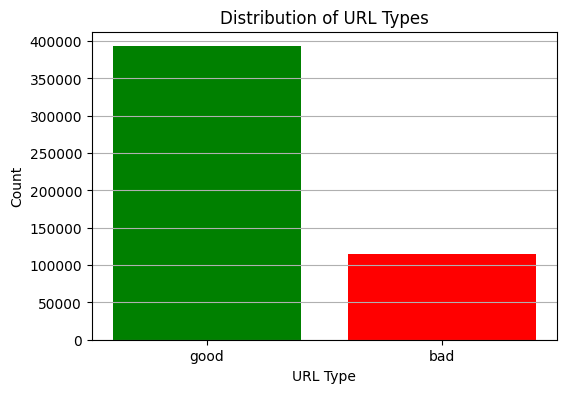

In [ ]:
import matplotlib.pyplot as plt

# Count labels
label_counts = df['Label'].value_counts()

# Print counts
print("=== Count of URL Types ===")
print(f"GOOD URLs: {label_counts.get('good', 0)}")
print(f"BAD URLs : {label_counts.get('bad', 0)}")

total = label_counts.sum()
print("\n=== Percentage of URL Types ===")
print(f"GOOD: {label_counts.get('good', 0) / total * 100:.2f}%")
print(f"BAD : {label_counts.get('bad', 0) / total * 100:.2f}%")

# Plot with matplotlib to avoid seaborn warning
plt.figure(figsize=(6, 4))
colors = ['green' if label == 'good' else 'red' for label in label_counts.index]
plt.bar(label_counts.index, label_counts.values, color=colors)
plt.title("Distribution of URL Types")
plt.xlabel("URL Type")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


The bar chart above shows the distribution of URLs by their label — whether the URL is **legitimate (GOOD)** or **malicious (BAD / phishing)**:

- **GOOD URLs**: 392,896 entries (≈ 77.46%)
- **BAD URLs**: 114,296 entries (≈ 22.54%)

#### Interpretation:
- The dataset is **imbalanced** — there are significantly more GOOD URLs than BAD ones.
- This imbalance can affect the performance of classification models:
  - A model might learn to favor predicting "GOOD" because it appears more frequently.
  - Therefore, we should handle this imbalance using techniques such as oversampling or undersampling


##Feature Engineering
In this stage, we go beyond simple statistics like `url_length` and extract **additional meaningful features** from each URL. These features are designed to capture structural, lexical, and behavioral characteristics that are commonly associated with phishing attempts.

By engineering a diverse set of features, we aim to:

- Enhance the dataset for **deeper correlation analysis**.
- Provide richer inputs for future **machine learning models**.
- Prepare the ground for **dimensionality reduction** based on correlation or importance.



In [ ]:
import re
from urllib.parse import urlparse

# === Feature Engineering: Additional URL-based Features ===

# Count digits in the URL
df['num_digits'] = df['URL'].apply(lambda x: sum(c.isdigit() for c in x))

# Count special characters (non-alphanumeric, excluding "/")
df['num_special_chars'] = df['URL'].apply(lambda x: sum(not c.isalnum() and c != '/' for c in x))

# Check if the URL uses HTTPS
df['has_https'] = df['URL'].apply(lambda x: 1 if x.startswith("https") else 0)

# Count subdomains (number of dots - 2: one for domain, one for TLD)
df['num_subdomains'] = df['URL'].apply(lambda x: max(urlparse(x).netloc.count('.') - 1, 0))

# Count number of path segments (number of "/" in the path)
df['num_path_segments'] = df['URL'].apply(lambda x: len(urlparse(x).path.split('/')) - 1)


To enrich our dataset and enable deeper analysis, we added the following engineered features based on the structure and content of each URL:

- **`num_digits`**: Counts how many digits appear in the URL. Attackers often include numeric patterns to simulate tracking numbers or IDs.
- **`num_special_chars`**: Measures the number of special characters (like `-`, `@`, `=`, `%`). Phishing URLs tend to have many such characters.
- **`has_https`**: A binary indicator for whether the URL starts with HTTPS. While not definitive, HTTPS absence can hint at unsafe domains.
- **`num_subdomains`**: Counts the number of subdomains by measuring dots in the domain name. More subdomains may indicate obfuscation.
- **`num_path_segments`**: Counts the number of path segments after the domain (e.g., `/login/reset/code/`). Deep URL structures are sometimes used to mislead.

These features will be used in the next stages: correlation analysis and dimensionality reduction.


##Correlation and association
In this section, we examine how the numerical feature url_length relates to the binary classification label (good or bad URL).
This analysis helps identify any measurable relationships or tendencies in the data that could be useful for modeling.

We begin by converting the categorical label to numeric values.

Then we compute the Point-Biserial correlation between url_length (numerical) and label_encoded (binary):




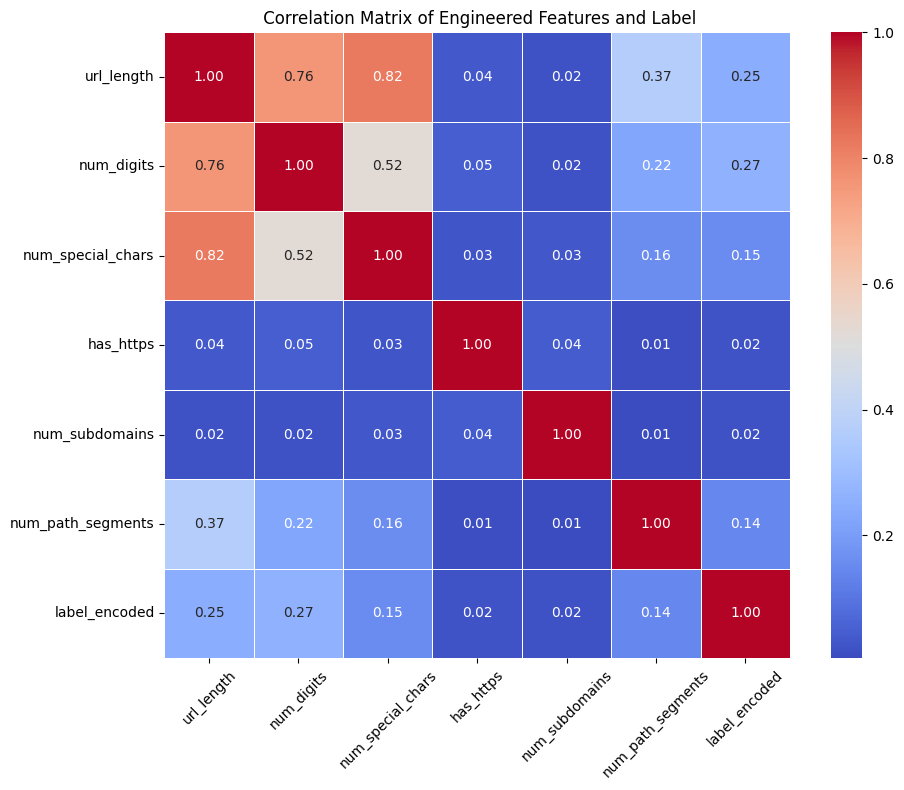

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the categorical label to numeric values for correlation analysis
df['label_encoded'] = df['Label'].map({'good': 0, 'bad': 1})

features_to_check = ['url_length', 'num_digits', 'num_special_chars', 'has_https', 'num_subdomains', 'num_path_segments', 'label_encoded']
df_corr = df[features_to_check]

# Calc the correlation matr
correlation_matrix = df_corr.corr(method='pearson')

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title(" Correlation Matrix of Engineered Features and Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Correlation and Association Analysis

After engineering several numerical features from the raw URL data (such as length, number of digits, special characters, and path segments), we now analyze their relationships—both with each other and with the binary label (`good` = 0, `bad` = 1).

#### Purpose of Correlation Analysis
The goal is twofold:
1. **Association with the target label**: Identify which features are more indicative of malicious (bad) URLs.
2. **Inter-feature correlation**: Detect redundancies or strong linear dependencies between features, which may be useful later for dimension reduction.

---

#### Observations from the Correlation Matrix

- **Positive Correlation with Label**:
    - `url_length` → **0.25**
    - `num_digits` → **0.27**
    - `num_special_chars` → **0.15**
    - `num_path_segments` → **0.14**

  These values indicate a **moderate to weak positive linear relationship** with the `label_encoded` column (0=good, 1=bad). In other words, longer URLs with more digits and special characters tend to be associated with bad (malicious) URLs.

- **Near-zero Correlation**:
    - `has_https` → **0.02**
    - `num_subdomains` → **0.02**

  These features show virtually **no linear relationship** with the label, suggesting they may have little predictive value in isolation.

---

#### Inter-feature Redundancy

- High correlation detected between:
    - `url_length` and `num_special_chars` → **0.82**
    - `url_length` and `num_digits` → **0.76**

  This suggests that longer URLs naturally contain more digits and special characters. These variables might be somewhat redundant, and we’ll evaluate them in the next step.

---

#### Summary

Our engineered features successfully highlight **some structural properties** of URLs that appear more frequently in malicious links. We now have:
- Evidence of useful features (`url_length`, `num_digits`, etc.) with moderate correlation to maliciousness.
- A signal for potential redundancy between certain features (e.g., `url_length` vs `num_special_chars`).

This sets the stage for the next step: **dimension reduction**, where we decide which features to keep or drop based on correlation, uniqueness, and potential predictive power.


##Dimension Reduction
Based on the correlation analysis, we now refine our dataset by selecting the most informative and least redundant features.

### Feature Removal Criteria:
- **Low correlation with the target label**: Features like `has_https` and `num_subdomains` show almost no relationship with maliciousness.
- **High inter-feature redundancy**: `num_special_chars` is strongly correlated with `url_length` (r = 0.82), and provides little additional value.

### Final Selected Features:
| Feature            | Justification |
|--------------------|-----------------------------|
| `url_length`        | Primary feature with strong signal. |
| `num_digits`        | Moderately correlated and semantically distinct. |
| `num_path_segments` | Slight correlation and reflects URL structure. |

We now move forward with a **reduced and cleaner feature set**, ready for modeling, clustering, or further analysis.


Selected Features for Modeling:
['url_length', 'num_digits', 'num_path_segments', 'label_encoded']


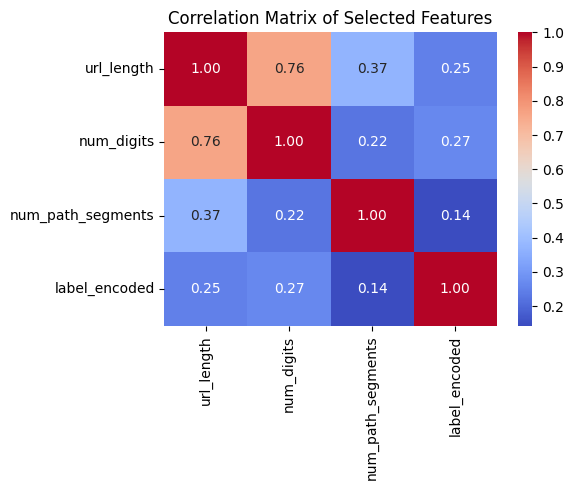

In [ ]:
# Step 1: Define final selected features
selected_features = [
    'url_length',
    'num_digits',
    'num_path_segments',
    'label_encoded'  # Keep label for supervised tasks
]

# Step 2: Create a reduced version of the dataset
df_reduced = df[selected_features].copy()

print("Selected Features for Modeling:")
print(df_reduced.columns.tolist())


# Compute correlation matrix for selected features
corr_matrix_reduced = df_reduced.corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix_reduced, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.tight_layout()
plt.show()


### Feature Correlation Heatmap (After Dimension Reduction)

We visualize the correlation matrix of the selected features to confirm:
- **No strong multicollinearity** between the engineered features.
- **Consistent relationship with the target label (`label_encoded`)**.

This final check ensures that the features are:
- **Informative** (correlated to the label).
- **Non-redundant** (not overly correlated with each other).

This validates our feature selection process and gives us a solid foundation for the next stage.


#Abnormality detection



In this stage, we aim to identify abnormal or anomalous patterns in the dataset that could negatively affect downstream machine learning models. These abnormalities may include:

- **Extreme values** in individual features (already handled in `url_length`),
- **Unusual combinations** across multiple features that deviate from the norm,
- **Potentially mislabeled or conflicting data points**.

By systematically detecting and handling such anomalies—both univariate and multivariate—we ensure the dataset remains clean, consistent, and reliable for modeling and decision-making.

## Single Feature Abnormality Detection

This step was partly addressed earlier in the pipeline under:  
**Data Statistics → Removing Extreme Outliers**

We initially focused on high-end outliers in the `url_length` feature and observed that while most URLs were shorter than 500 characters, a small number of extreme outliers exceeded 1500 — with some reaching over 2300. These highly abnormal URLs could result from parsing errors, automated tracking links, or structural anomalies. To prevent these cases from distorting summary statistics and downstream visualizations, we removed all entries with `url_length > 1500`.

In this stage, we extend our abnormality detection to **low-end outliers**, specifically URLs with unusually short lengths. Through analysis of the URL length distribution, we observed that some entries had a length of just 1–3 characters — even though a minimal valid domain name (such as `a.co`) requires at least 4 characters.

We performed a targeted inspection of these short URLs, and most were either **malformed, synthetic, or placeholders**, with highly ambiguous or unreliable labels.

To improve data quality and prevent potential bias from incomplete or corrupted entries, we now remove all rows with `url_length < 4`.


Removed 4 entries with url_length < 4.


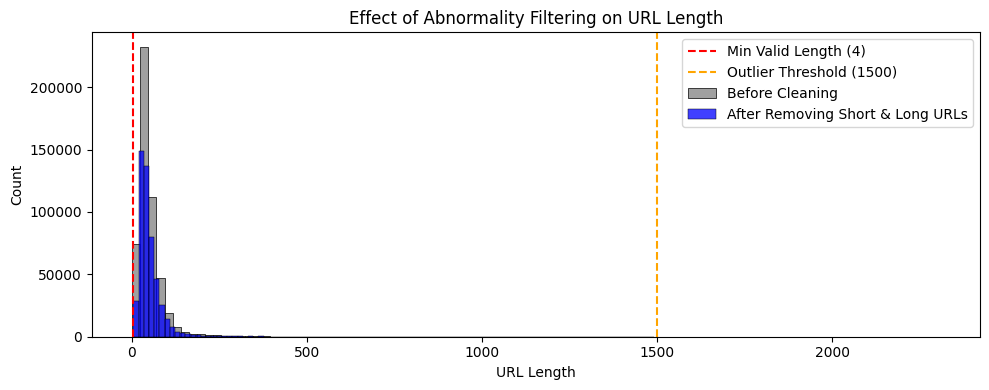

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

initial_count = len(df)
df = df[df['url_length'] >= 4]
removed_count = initial_count - len(df)

print(f"Removed {removed_count} entries with url_length < 4.")

plt.figure(figsize=(10, 4))
sns.histplot(df_original['url_length'], bins=100, color='gray', label='Before Cleaning', kde=False)
sns.histplot(df['url_length'], bins=100, color='blue', label='After Removing Short & Long URLs', kde=False)
plt.axvline(x=4, color='red', linestyle='--', label='Min Valid Length (4)')
plt.axvline(x=1500, color='orange', linestyle='--', label='Outlier Threshold (1500)')
plt.title("Effect of Abnormality Filtering on URL Length")
plt.xlabel("URL Length")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


### Visualization of URL Length Filtering

The histogram above demonstrates the impact of abnormality filtering applied to the `url_length` feature:

- **Gray bars** represent the original distribution of all URL lengths *(before cleaning)*.
- **Blue bars** show the distribution *after removing both extremely short and long URLs*.
- The **red dashed line** marks the **minimum valid URL length** (`url_length = 4`), based on domain structure (e.g., `a.co`).
- The **orange dashed line** marks the **upper threshold** (`url_length = 1500`), above which URLs were considered abnormally long.

---

#### Summary of the cleaning step:

- We **removed 4 entries** with `url_length < 4`, as they were **too short** to represent valid domains or meaningful structures.
- We also **removed extremely long URLs** with `url_length > 1500`, which might be due to **malformed tracking links** or **structural anomalies**.

This cleaning step ensures that the **statistical analyses, visualizations, and modeling** are focused on URLs with **plausible and consistent lengths**, minimizing noise from **irregular or suspicious entries**.


## Multi-Feature Abnormality Detection
In this stage, we aim to detect suspicious or irregular entries by analyzing the **joint behavior of multiple features**, rather than inspecting each feature independently.

To achieve this, we used the **Isolation Forest** algorithm — a tree-based ensemble method designed for unsupervised anomaly detection in high-dimensional datasets. It isolates observations that are "few and different", making it effective at identifying unusual combinations of values.

We applied the model to the following engineered features:

- `url_length` – total number of characters in the URL  
- `num_digits` – number of numeric characters in the URL  
- `num_path_segments` – number of segments in the URL path

> We previously removed other features like `num_special_chars` and retained only the **selected features** following our correlation and feature reduction analysis.

The model was configured with a **contamination rate** of `2%`, meaning we expect roughly 2% of the entries to be anomalous.


,url_length,num_digits,num_path_segments,Multivariate Outlier
0,225,58,8,True
1,81,1,4,False
2,177,47,11,True
3,60,0,2,False
4,116,21,7,False


 Total multivariate anomalies detected: 10144


,url_length,num_digits,num_path_segments,Multivariate Outlier
0,225,58,8,True
2,177,47,11,True
9,193,35,10,True
31,188,38,10,True
63,189,81,2,True


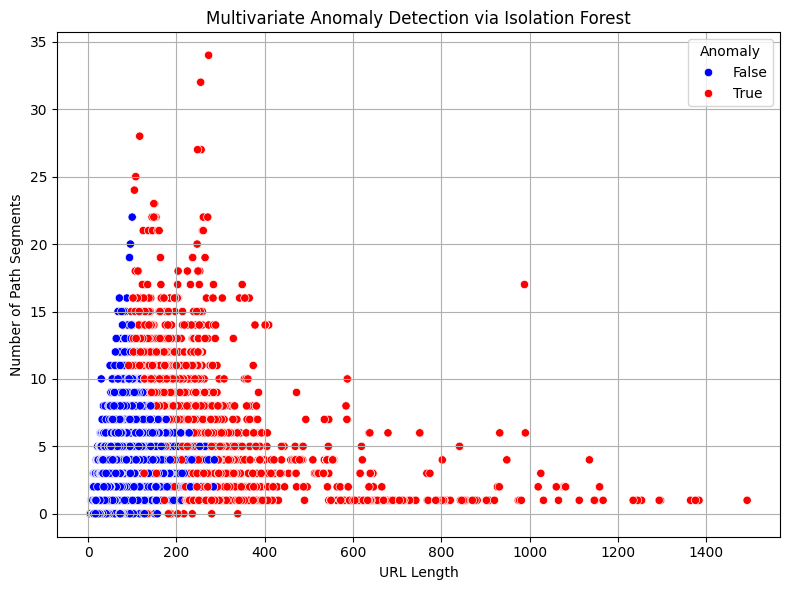

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Select relevant features ---
selected_features = ['url_length', 'num_digits', 'num_path_segments']
X_selected = df[selected_features]

# --- Step 2: Apply Isolation Forest ---
iso_model = IsolationForest(contamination=0.02, random_state=42)
df['Multivariate Outlier'] = iso_model.fit_predict(X_selected) == -1  # True if outlier

# --- Step 3: Display sample output with labels ---
display_columns = selected_features + ['Multivariate Outlier']
display(df[display_columns].head())

# --- Step 4: Display only the detected anomalies ---
anomalies = df[df['Multivariate Outlier'] == True]
print(f" Total multivariate anomalies detected: {len(anomalies)}")
display(anomalies[display_columns].head())

# --- Optional visualization ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='url_length',
    y='num_path_segments',
    hue='Multivariate Outlier',
    palette={False: 'blue', True: 'red'}
)
plt.title("Multivariate Anomaly Detection via Isolation Forest")
plt.xlabel("URL Length")
plt.ylabel("Number of Path Segments")
plt.legend(title='Anomaly')
plt.grid(True)
plt.tight_layout()
plt.show()


We used the **Isolation Forest** algorithm — a powerful tree-based method designed to identify anomalies in high-dimensional spaces. The algorithm works by isolating data points that require fewer random splits to be separated from the rest of the dataset.

### Anomaly Detection Process

- We applied the **Isolation Forest** algorithm with a `contamination=0.02`, meaning we expect ~2% of entries to be anomalies.
- The algorithm evaluated each row across the multidimensional feature space.
- Output labels were stored in a column called `Multivariate Outlier`, where:
  - `True` indicates an anomaly
  - `False` indicates a normal entry

---

### Visualization

The scatter plot below displays the relationship between `url_length` and `num_path_segments`, with points color-coded by anomaly status:

- **Red dots**: flagged anomalies
- **Blue dots**: normal entries

From the chart, we can observe:

Many red points appear in extreme regions — such as:

Long URLs with very few segments

Short URLs with unusually many segments

These rare combinations are flagged as suspicious, even if their individual values aren't extreme.

---

###What Do We Do With the Anomalies?
At this point, we are not deleting these anomalies. Instead, we retain them in the dataset for future analysis:

Some outliers might represent crafted malicious URLs (e.g., phishing attempts or obfuscated links)

Rare patterns may provide important signals in downstream tasks such as:

Clustering

Classification

Threat intelligence

---

###Conclusion:

Multivariate anomaly detection enables us to uncover unusual and complex behaviors across multiple features.

By leveraging Isolation Forest, we can detect rare and potentially suspicious URLs that may not stand out in single-feature analysis — thus improving the robustness of our preprocessing and downstream modeling.

We now move forward with the full dataset (including anomalies) into the next stages of our pipeline.

##Z-score Based Anomaly Detection
We apply the Z-score method to identify anomalies in individual numerical features. The Z-score measures how many standard deviations away from the mean a data point is. A common practice is to flag points with a Z-score above a certain threshold (e.g., 3 or -3) as outliers.

We calculate Z-scores for the following features: url_length, num_digits, and num_path_segments.

In [ ]:
from scipy.stats import zscore
import numpy as np

# Define features for Z-score analysis
features_for_zscore = ['url_length', 'num_digits', 'num_path_segments']

# Calculate Z-scores for the selected features
# We use .copy() to avoid SettingWithCopyWarning
df_temp = df[features_for_zscore].copy()
z_scores = df_temp.apply(zscore)

# Define a Z-score threshold for identifying outliers
z_score_threshold = 3

# Identify outliers based on the threshold
# An entry is flagged if its Z-score for any of the selected features is above the threshold
df['Zscore_Outlier'] = np.any(np.abs(z_scores) > z_score_threshold, axis=1)

# Display the number of entries flagged as Z-score outliers
print(f"Number of entries flagged as Z-score outliers (threshold = {z_score_threshold}): {df['Zscore_Outlier'].sum()}")

# Display sample data including the new Z-score outlier flag
display(df[['URL'] + features_for_zscore + ['Zscore_Outlier', 'Label']].head())

# Optionally display some of the flagged outliers
print("\nSample entries flagged as Z-score outliers:")
display(df[df['Zscore_Outlier'] == True][['URL'] + features_for_zscore + ['Label']].head())

Number of entries flagged as Z-score outliers (threshold = 3): 19380


,URL,url_length,num_digits,num_path_segments,Zscore_Outlier,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,225,58,8,True,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,81,1,4,False,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,177,47,11,True,bad
3,mail.printakid.com/www.online.americanexpress....,60,0,2,False,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,116,21,7,True,bad



Sample entries flagged as Z-score outliers:


,URL,url_length,num_digits,num_path_segments,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,225,58,8,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,177,47,11,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,116,21,7,bad
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,193,35,10,bad
25,www.revitolcream.org/wp-content/plugins/all-in...,87,2,7,bad


### Interpretation of Z-score Based Anomaly Detection

After applying the Z-score method with a threshold of 3, we identified **19,380** entries flagged as potential outliers. This means these URLs have a Z-score greater than 3 or less than -3 for at least one of the analyzed features (`url_length`, `num_digits`, `num_path_segments`).

The Z-score method helps us identify data points that are statistically unusual in terms of their distance from the mean of the distribution for these features. While Isolation Forest looked at multivariate combinations, Z-score highlights extreme values in individual dimensions.

These URLs represent entries with:
- Extremely long or short lengths (relative to the mean)
- An unusually high or low number of digits
- An unusually high or low number of path segments

Like the multivariate outliers, these Z-score outliers are kept in the dataset for now. They may represent genuinely anomalous (potentially malicious) URLs or rare but legitimate structures. Flagging them allows for further investigation or specific handling in later stages of the pipeline if desired.

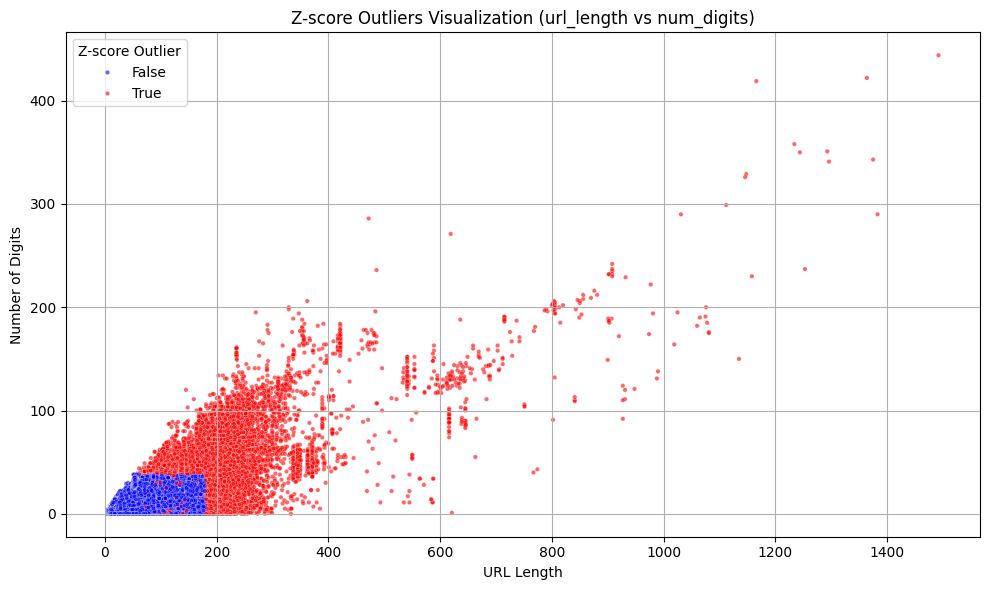

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains 'url_length', 'num_digits', 'num_path_segments', and 'Zscore_Outlier'

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='url_length',
    y='num_digits',
    hue='Zscore_Outlier',
    palette={False: 'blue', True: 'red'}, # Red for Z-score outliers, blue for normal
    alpha=0.6, # Make points slightly transparent
    s=10 # Adjust point size for better visibility with many points
)
plt.title("Z-score Outliers Visualization (url_length vs num_digits)")
plt.xlabel("URL Length")
plt.ylabel("Number of Digits")
plt.legend(title='Z-score Outlier')
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualization of Z-score Based Anomaly Detection

This scatter plot visualizes the distribution of URLs based on two of the features used for Z-score outlier detection (`url_length` and `num_digits`), with points colored according to the `Zscore_Outlier` flag:

- **Blue points:** URLs that were *not* flagged as Z-score outliers (within the threshold).
- **Red points:** URLs that *were* flagged as Z-score outliers (outside the threshold).

From the plot, you can observe:

- The majority of URLs (blue points) are concentrated in the lower left area, representing URLs with shorter lengths and fewer digits.
- The **red points (outliers)** are typically found far away from this main cluster of blue points, often in areas representing:
    - Very long URLs (far to the right).
    - URLs with a very high number of digits (further up).
    - Combinations where one or both features are extreme relative to the dataset's mean and standard deviation.

This visualization confirms that the Z-score method effectively flags data points with extreme values in individual features as outliers, helping to visually identify these unusual entries in the feature space.

#Clustering




##Clustering URLs via KMeans + PCA
After identifying anomalies, we aim to segment the dataset into **coherent clusters** based on structural URL features.
This helps uncover hidden groups or behaviors, such as spam-like structures or unusual patterns.

###We followed these steps:
1. **Feature Selection**: Chose the relevant engineered features — `url_length`, `num_digits`, and `num_path_segments`.
2. **Standardization**: Scaled all features using `StandardScaler`, since KMeans is distance-based and sensitive to scale.
3. **Elbow Method**: Applied the Elbow Method to determine the optimal number of clusters `k`.
4. **KMeans Clustering**: Trained the model with `k=3` (chosen from elbow), and stored the resulting cluster labels.
5. **PCA Visualization**: Reduced the dimensionality to 2D using PCA to visualize the cluster structure.

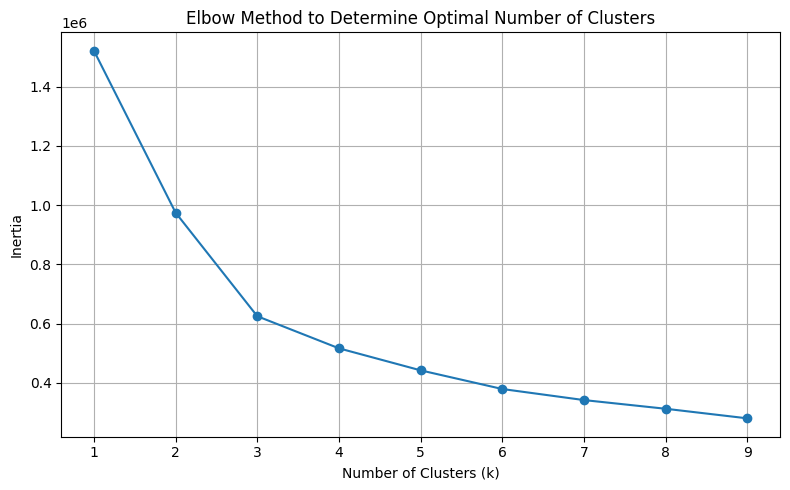

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select relevant features
features = ['url_length', 'num_digits', 'num_path_segments']
X = df[features]

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Use Elbow Method to determine optimal k
inertias = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Step 4: Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()




The **Elbow Method** plots the number of clusters `k` versus the total within-cluster **inertia** (sum of squared distances).

- We observe a **sharp drop** in inertia until `k=3`, after which the curve flattens.
- This indicates that adding more clusters beyond `k=3` yields diminishing returns.
- Therefore, we selected **k = 3** as the optimal number of clusters.


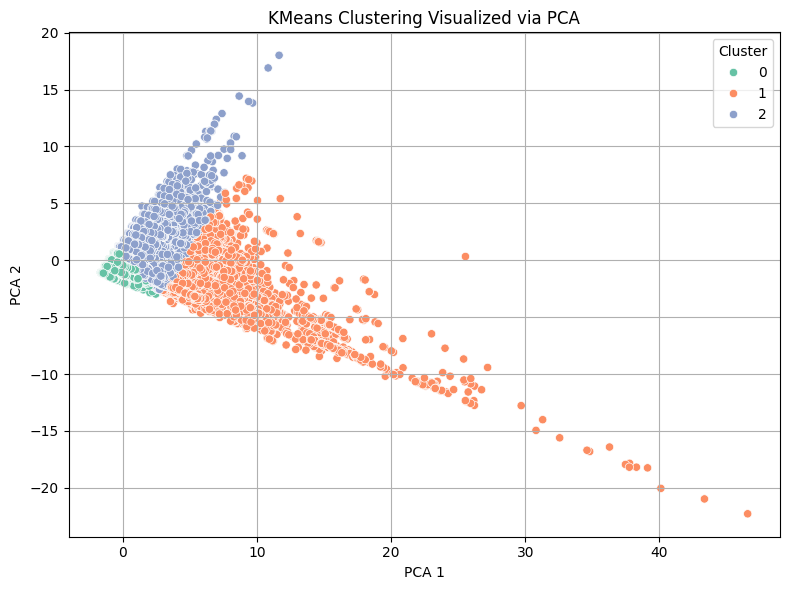

In [ ]:
# Step 5: Fit KMeans with selected k (e.g., k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 6: PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Step 7: Visualize clusters in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("KMeans Clustering Visualized via PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

We applied KMeans with `k=3` and projected the data into 2 dimensions using PCA.

- Each point represents a URL entry in the dataset.
- Color indicates the assigned cluster (0, 1, 2).
- The PCA transformation helps us **visualize** high-dimensional clusters in 2D space.

###Interpretation of Clusters
- **Cluster 0** (light green): Likely contains shorter and simpler URLs — could be benign or legitimate.
- **Cluster 1** (orange): Larger and more dispersed — likely captures URLs with more digits or longer paths, possibly automated or suspicious.
- **Cluster 2** (light blue): Compact group — likely structurally similar URLs (e.g., templated spam or phishing links).

##Analyze Distance to Cluster Centers
In this stage, we analyze how close each data point is to the center of its assigned cluster, helping us interpret the quality and structure of the KMeans clustering.

### What we did?

- **Used `pairwise_distances_argmin_min()`** to compute the **Euclidean distance** between each point and the centroid of its assigned cluster (in standardized feature space).
- **Added a new column `Distance to Center`** in the dataset to store these values.
- **Grouped data by `Cluster`** to compute:
  - Average feature values per cluster
  - Average distance to center — a proxy for cluster compactness
- **Identified potential outliers** — the most distant point from each cluster center.
- **Visualized feature distributions** using **boxplots**, broken down by cluster.

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min

# Compute distances to cluster centers
closest, distances = pairwise_distances_argmin_min(X_scaled, kmeans.cluster_centers_)
df['Distance to Center'] = distances

# Cluster Summary Statistics
cluster_summary = df.groupby('Cluster')[features + ['Distance to Center']].mean()
display(cluster_summary)

# Detect Outliers in Each Cluster
outliers = df.loc[df.groupby('Cluster')['Distance to Center'].idxmax()]
display(outliers[['Cluster', 'Distance to Center'] + features])



,url_length,num_digits,num_path_segments,Distance to Center
Cluster,,,,
0,37.850378,1.937475,1.737904,0.636154
1,260.506779,68.106865,3.630298,3.402755
2,73.287556,7.848597,4.208672,1.179431


,Cluster,Distance to Center,url_length,num_digits,num_path_segments
12232,0,4.079242,128,39,0
483940,1,44.214713,1492,444,1
32618,2,20.219527,273,0,34


### Most Distant Point in Each Cluster

These are the **top outliers**, flagged by their **extreme distance from the cluster center**:

- **Cluster 0**: Relatively normal range, but this point is at the edge.
- **Cluster 1**: One point has an extremely long URL (1492 chars!) with 444 digits – **very likely suspicious or crafted**.
- **Cluster 2**: One point with **34 segments** in the path and no digits – highly unusual.

These records should be flagged for further inspection or considered for threat analysis.


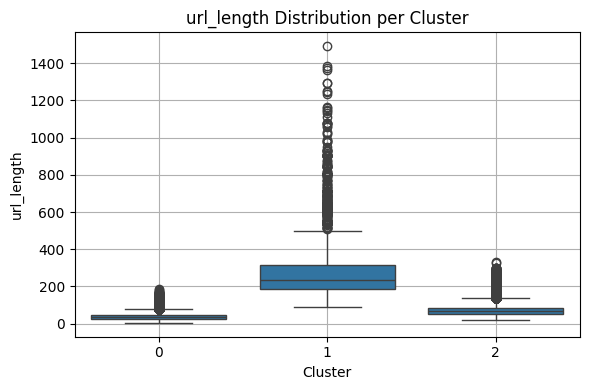

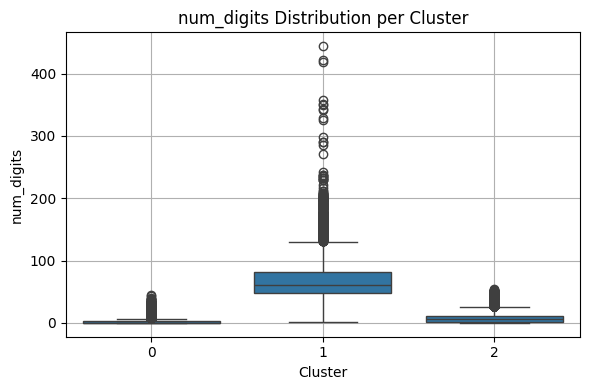

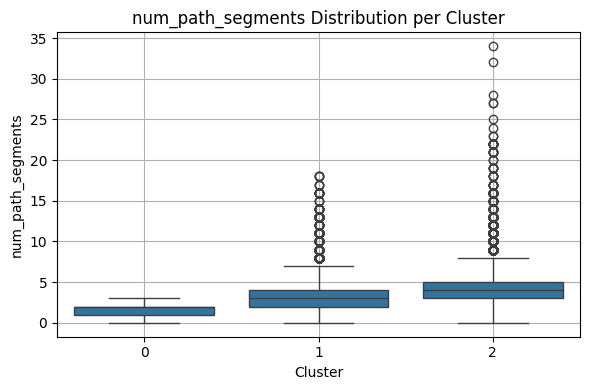

In [ ]:
# Feature Distributions per Cluster (Boxplots)
features = ['url_length', 'num_digits', 'num_path_segments']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f"{feature} Distribution per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Boxplot Interpretation: Feature Distributions Across Clusters

In this section, we analyze the distributions of key features (`url_length`, `num_digits`, `num_path_segments`) across the identified clusters using boxplots. These visualizations help us understand the characteristics and outliers in each cluster.

---

### Feature 1: `url_length`

- **Cluster 1** shows a **long-tailed distribution** with extreme outliers, reaching well beyond 1000 characters.
- **Cluster 0** displays **short and compact URLs**, tightly clustered with very few outliers.
- **Cluster 2** has moderate-length URLs with slightly more variation than Cluster 0.

 **Insight**:  
Cluster 1 likely includes **suspicious or anomalously long URLs**, potentially used in phishing attacks to obscure the true destination. Cluster 0 contains **benign, simple URLs**, while Cluster 2 is more varied.

---

### Feature 2: `num_digits`

- **Cluster 1** again has **very high values**, including URLs with hundreds of digits — a clear anomaly.
- **Cluster 0** contains URLs with **few digits**, indicating likely normal structure.
- **Cluster 2** sits in between, with moderate digit usage.

 **Insight**:  
A high count of digits can indicate **machine-generated or obfuscated URLs**, often seen in **malware delivery or spam**. This further confirms that **Cluster 1 is the most suspicious** group.

---

### Feature 3: `num_path_segments`

- **Cluster 2** has a **higher number of path segments**, sometimes exceeding 30 — likely deeply nested URL paths.
- **Cluster 0** has simple URL paths (1–3 segments), indicating basic or homepage-like links.
- **Cluster 1** shows intermediate behavior — not as shallow as Cluster 0, but not as deep as Cluster 2.

 **Insight**:  
Cluster 2 may represent **dynamic or API-style URLs** with complex structure, while Cluster 0 includes **static or minimal URLs**, and Cluster 1 remains mixed.

---

### Overall Observations

- **Cluster 0**: Simple, clean URLs — likely benign.
- **Cluster 1**: Outlier-heavy, long and digit-dense URLs — **potentially malicious**.
- **Cluster 2**: Deep structures and more complexity — could represent **dynamic or auto-generated URLs**.

These boxplots provide a crucial layer of interpretability to our KMeans clustering results by helping characterize **what kind of URLs are grouped together** and **why**.

---


## Label Distribution (Good / Bad) per Cluster

In [ ]:
# Group by cluster and count the occurrences of each label
cluster_label_counts = df.groupby('Cluster')['Label'].value_counts().unstack().fillna(0)

print("Count of Good and Bad URLs per Cluster:")
display(cluster_label_counts)

Count of Good and Bad URLs per Cluster:


Label,bad,good
Cluster,,
0,66217,295735
1,9082,285
2,38996,96873




This table shows the count of "good" and "bad" URLs within each cluster. This analysis, combined with the previous Boxplots of the features, helps understand the nature of each cluster:

- **Cluster 0:** Contains the vast majority of **good** URLs (over 295,000). Its characteristics (as seen in the Boxplots) are generally **short length**, **few digits**, and **few path segments**.
- **Cluster 1:** Contains relatively few URLs overall, but the **ratio of bad to good leans towards bad** (around 9,000 bad versus around 280 good). This cluster is characterized by **very long URLs**, with **many digits** and a wide spread in these features. This is a suspicious group that warrants further investigation.
- **Cluster 2:** Contains a large number of URLs, with a **higher proportion of bad** than Cluster 0 (around 39,000 bad versus around 96,000 good), although the majority are still good. This cluster is characterized by a **higher number of path segments** and moderate length and digits. It likely represents more complex or automated URLs.

**Conclusion:** Cluster 1 is the most suspicious cluster in terms of "bad" content, which aligns with the extreme characteristics observed in the Boxplot analysis for this cluster.

## Combined Anomaly Flag

In [ ]:
# Calculate a threshold based on the 95th percentile of the distance to center
# This flags points that are in the top 5% furthest from their cluster centroids
threshold = df['Distance to Center'].quantile(0.95)

# Define a new combined anomaly flag
# A point is flagged as 'Any Outlier' if it was marked by the Isolation Forest
# OR if its distance to its cluster center is above the calculated threshold.
# OR if it was flagged as a Z-score outlier.
df['Any Outlier'] = (
    df['Multivariate Outlier'] |
    (df['Distance to Center'] > threshold) |
    df['Zscore_Outlier'] # Include the Z-score outlier flag
)

print(f"Calculated Distance Threshold (95th percentile): {threshold:.2f}")
print(f"Number of entries flagged as 'Any Outlier': {df['Any Outlier'].sum()}")

# Display sample data with the new flag
display(df[['URL', 'Label', 'Cluster', 'Multivariate Outlier', 'Zscore_Outlier', 'Distance to Center', 'Any Outlier']].head())

Calculated Distance Threshold (95th percentile): 1.93
Number of entries flagged as 'Any Outlier': 28259


,URL,Label,Cluster,Multivariate Outlier,Zscore_Outlier,Distance to Center,Any Outlier
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,1,True,True,3.133042,True
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,2,False,False,0.649500,False
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,1,True,True,5.568678,True
3,mail.printakid.com/www.online.americanexpress....,bad,0,False,False,0.574860,False
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,2,False,True,2.401375,True




Building upon the previous steps of multivariate outlier detection (Isolation Forest) and clustering, we create a combined anomaly flag to capture data points that are considered unusual by either method.

This step aims to:

1.  **Identify points far from their cluster centers:** We calculate a distance threshold based on the 95th percentile of the 'Distance to Center' metric. Data points with a distance exceeding this threshold are considered potential outliers within their cluster context.
2.  **Combine different outlier perspectives:** A new boolean column, 'Any Outlier', is created. An entry is flagged as `True` in this column if it was identified as a multivariate outlier by the Isolation Forest OR if its distance to its assigned cluster center is above the calculated threshold.

This combined flag provides a more comprehensive view of potential anomalies, integrating insights from both density-based (Isolation Forest) and distance-based (Clustering distance) anomaly detection approaches. These flagged URLs can be subject to further investigation or treated differently in subsequent modeling stages.

## Clustering Section Summary

In this section, we explored clustering techniques to group URLs based on their engineered structural features.

-   We applied **K-Means clustering** to the selected features (`url_length`, `num_digits`, `num_path_segments`).
-   The **Elbow Method** suggested **k=3** as the optimal number of clusters.
-   We visualized the clusters in 2D using **PCA**, showing distinct groupings based on the features.
-   We analyzed the **distance to cluster centers** and identified points furthest from their centroids.
-   **Boxplots** of features per cluster revealed key characteristics: Cluster 0 contained short, simple URLs; Cluster 1 had very long, digit-heavy URLs with many outliers; and Cluster 2 showed more complex path structures.
-   Analyzing the **label distribution (good/bad) per cluster** confirmed that **Cluster 1 is highly suspicious**, containing a significantly higher proportion of 'bad' URLs compared to its size.
-   Finally, we created a **combined anomaly flag** by combining multivariate outliers (from Isolation Forest) with points significantly distant from their cluster centers.

This clustering analysis provided valuable insights into the structural patterns of URLs and helped identify potentially malicious or anomalous groups.

#Segment analysis

## 1) Temporal Analysis

This section would typically analyze how the characteristics of different URL segments (clusters) change over time. This could involve looking at:

- Trends in the frequency of URLs from each cluster.
- Changes in the feature distributions within clusters over time.
- The emergence or disappearance of certain types of anomalous URLs.

However, this dataset does **not** include any temporal information (like a timestamp indicating when a URL was observed or added). Therefore, a temporal analysis is not possible with the current data.

## 2) Features Analysis per Segment

Based on the KMeans clustering results and the analysis of feature distributions (boxplots) and label counts per cluster, we can characterize each segment as follows:

### Cluster 0: Short and Simple URLs
**66217 - bad / 295735 - good**

*   **Feature Profile:** This cluster contains URLs with generally **short lengths**, **few digits**, and a **low number of path segments**. The boxplots clearly show that the majority of URLs in this cluster are concentrated at the lower end of the scale for these features.
*   **Label Distribution:** The vast majority of URLs in Cluster 0 are labeled as **'good'**. This aligns with the expectation that legitimate and benign URLs tend to be structurally simpler.
*   **Interpretation:** This segment likely represents typical, well-formed URLs for legitimate websites, such as homepages or direct links to content, without complex structures or excessive parameters often used in malicious activities.

### Cluster 1: Long, Digit-Heavy, and Highly Suspicious URLs
**9082 - bad / 285 - good**

*   **Feature Profile:** This cluster is characterized by **very long URL lengths**, a **high number of digits**, and a significant spread in these features. The boxplots show a high concentration of outliers and extreme values in `url_length` and `num_digits` within this cluster. The average `Distance to Center` is also highest for this cluster, indicating less internal compactness.
*   **Label Distribution:** Despite being the smallest cluster in terms of count, Cluster 1 has a **significantly higher proportion of 'bad' URLs** compared to its size and compared to the other clusters. While there are still 'good' URLs, the ratio is heavily skewed towards 'bad'.
*   **Interpretation:** This segment strongly correlates with characteristics commonly found in **phishing or malicious URLs**. The excessive length and high digit count can be indicative of obfuscation, encoded payloads, or dynamically generated malicious links designed to evade detection. This cluster is a prime target for further investigation and forms a crucial part of the 'bad' URL landscape.

### Cluster 2: Moderate Length, More Complex Path Structures
**38996 - bad / 96873 - good**

*   **Feature Profile:** URLs in Cluster 2 have **moderate lengths** and **digit counts** compared to the other clusters. Their most distinguishing feature is a **higher number of path segments**.
*   **Label Distribution:** Cluster 2 contains a mix of both 'good' and 'bad' URLs, with a **higher proportion of 'bad' URLs than Cluster 0**, but still predominantly 'good'.
*   **Interpretation:** This segment likely includes URLs that are more complex than simple homepages but do not exhibit the extreme characteristics of Cluster 1. This could encompass URLs for specific product pages, articles with deeper paths, or potentially automated systems. The presence of a notable number of 'bad' URLs suggests that some phishing attempts may utilize more structured or dynamic URLs that fall into this intermediate complexity range.

## Domain Knowledge Interpretation of Segments

Based on the characteristics observed in the feature analysis and the label distributions, we can interpret the identified clusters through the lens of cybersecurity and phishing tactics. This domain knowledge helps us understand why certain structural properties are more prevalent in malicious URLs and how segmenting the data can aid in detection.

In [ ]:
# Display sample URLs from the most suspicious cluster (Cluster 1)
print("Sample URLs from Cluster 1 (Highly Suspicious):")
display(df[df['Cluster'] == 1][['URL', 'url_length', 'num_digits', 'num_path_segments', 'Label']].head())

Sample URLs from Cluster 1 (Highly Suspicious):


,URL,url_length,num_digits,num_path_segments,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,225,58,8,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,177,47,11,bad
31,horizonsgallery.com/js/bin/ssl/_id/www.paypal....,188,38,10,bad
63,distritabas.com.ar/survey/webscr.php?cmd=_logi...,189,81,2,bad
76,raboardiendo.es/cmd/paypal/2/897962b2c7faf34e7...,206,104,5,bad


### Interpretation based on Domain Knowledge:

Looking at samples from **Cluster 1**, we see URLs with characteristics often associated with phishing and malicious activities:

*   **Excessive Length (`url_length`)**: Phishing URLs are often artificially lengthened to hide the true domain name or embed long strings of data (like encoded payloads or multiple subdomains). This makes it harder for users to quickly identify the legitimate site.
*   **High Number of Digits (`num_digits`)**: Including many digits can be a sign of dynamically generated URLs used in spam campaigns or malware distribution. It can also be part of IP addresses disguised as URLs or numeric strings used for tracking or obfuscation.
*   **Path Structure (`num_path_segments`)**: While not as defining for Cluster 1 as length and digits, complex or unusual path structures can also be used to confuse users or point to specific exploit kits or landing pages.

These observations align with common phishing tactics aimed at deceiving users and evading simple detection rules. By identifying Cluster 1, we've isolated a segment of URLs that are highly likely to be malicious based on their structural makeup, which is a valuable insight for building a phishing detection model.

The other clusters also fit within domain knowledge:

*   **Cluster 0** represents the baseline of **legitimate URLs**, which are generally shorter and simpler.
*   **Cluster 2** shows URLs with **more complex paths** but not the extreme length/digit characteristics of phishing, potentially representing legitimate dynamic content or applications.

Understanding these segments allows for potentially tailored detection strategies.

#NLP

##Feature Extraction from URL Components

In [ ]:
import tldextract
from urllib.parse import urlparse
import pandas as pd

# Function to extract features from URL components
def extract_url_component_features(url):
    try:
        parsed_url = urlparse(f"http://{url}") # Add scheme for robust parsing
        tld_info = tldextract.extract(url)

        features = {}

        # Features from tldextract
        features['domain'] = tld_info.domain
        features['subdomain'] = tld_info.subdomain
        features['suffix'] = tld_info.suffix

        # Features from urlparse
        features['path'] = parsed_url.path
        features['params'] = parsed_url.params
        features['query'] = parsed_url.query
        features['fragment'] = parsed_url.fragment

        # Length features
        features['len_domain'] = len(features['domain'])
        features['len_subdomain'] = len(features['subdomain'])
        features['len_suffix'] = len(features['suffix'])
        features['len_path'] = len(features['path'])
        features['len_params'] = len(features['params'])
        features['len_query'] = len(features['query'])
        features['len_fragment'] = len(features['fragment'])

        # Count of specific special characters in relevant parts
        special_chars = "-@_?=&./,"
        for char in special_chars:
            features[f'count_{char}_domain'] = features['domain'].count(char)
            features[f'count_{char}_subdomain'] = features['subdomain'].count(char)
            features[f'count_{char}_path'] = features['path'].count(char)
            features[f'count_{char}_query'] = features['query'].count(char)

        # Letter and number counts in domain and path
        features['letter_count_domain'] = sum(c.isalpha() for c in features['domain'])
        features['number_count_domain'] = sum(c.isdigit() for c in features['domain'])
        features['letter_count_path'] = sum(c.isalpha() for c in features['path'])
        features['number_count_path'] = sum(c.isdigit() for c in features['path'])


        return features
    except Exception as e:
        # Print the URL that caused the error and the error message for debugging
        # print(f"Error processing URL: {url} - {e}")
        return None # Return None for URLs that cause parsing errors

# Apply the feature extraction function to each URL
# Using .progress_apply if available for progress bar (requires tqdm)
# If tqdm is not installed or preferred, use .apply
try:
    from tqdm.auto import tqdm
    tqdm.pandas()
    component_features = df['URL'].progress_apply(extract_url_component_features)
except ImportError:
    print("tqdm not found, applying without progress bar.")
    component_features = df['URL'].apply(extract_url_component_features)

# --- FIX: Filter out None values before creating DataFrame ---
# Filter out rows from the original df and component_features where feature extraction failed
successful_indices = component_features.dropna().index
df_filtered = df.loc[successful_indices].reset_index(drop=True)
component_features_df = pd.DataFrame(list(component_features.dropna())) # Create DataFrame from non-None results

# Before merging, ensure both dataframes have the same number of rows after dropping NAs if any
if len(df_filtered) == len(component_features_df):
    # Merge the new features back into the main DataFrame
    df = pd.concat([df_filtered, component_features_df], axis=1)
    print(f"Successfully extracted component features for {len(df)} URLs.")
else:
    # This case should ideally not happen after filtering, but good for robustness
    print(f"Mismatch in row counts after filtering: original df {len(df_filtered)}, extracted features {len(component_features_df)}. Cannot merge.")


# Display the first few rows with the new features
print("\nDataFrame with new URL component features:")
display(df.head())

  0%|          | 0/507188 [00:00<?, ?it/s]

Successfully extracted component features for 507170 URLs.

DataFrame with new URL component features:


,URL,Label,url_length,num_digits,num_special_chars,has_https,num_subdomains,num_path_segments,label_encoded,Multivariate Outlier,...,count_/_path,count_/_query,"count_,_domain","count_,_subdomain","count_,_path","count_,_query",letter_count_domain,number_count_domain,letter_count_path,number_count_path
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,225,58,22,0,0,8,1,True,...,8,2,0,0,0,0,6,0,68,45
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,81,1,11,0,0,4,1,False,...,4,0,0,0,0,0,7,0,52,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,177,47,8,0,0,11,1,True,...,11,0,0,0,0,0,12,0,96,47
3,mail.printakid.com/www.online.americanexpress....,bad,60,0,6,0,0,2,1,False,...,2,0,0,0,0,0,9,0,36,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,116,21,3,0,0,7,1,False,...,7,3,0,0,0,0,15,0,52,0




In this first step of the NLP stage, we focused on extracting detailed structural and lexical features from different components of each URL. Unlike traditional text, URLs have a defined structure (scheme, domain, path, query, etc.), and analyzing these parts can reveal patterns indicative of malicious intent.

We used libraries like `urllib.parse` and `tldextract` to break down each URL and extract features including:

-   **Length of each component:** (e.g., `len_domain`, `len_path`, `len_query`)
-   **Count of specific special characters:** within key components (e.g., `count_-_domain`, `count_&_query`)
-   **Count of letters and numbers:** within the domain and path (e.g., `letter_count_domain`, `number_count_path`)

These features provide a more granular view of the URL's composition beyond just its total length, allowing us to capture more subtle structural characteristics that might differentiate phishing URLs from legitimate ones.

##Lexical Pattern Analysis

In [ ]:
# --- Step 2: Lexical Pattern Analysis (Keywords) ---

# Define a list of potentially suspicious keywords
suspicious_keywords = [
    'login', 'account', 'bank', 'update', 'verify', 'confirm', 'secure',
    'webscr', 'paypal', 'ebay', 'amazon', 'banking', 'signin', 'alert',
    ' suspended', 'restricted', 'compromised', 'phishing', 'virus', 'alert',
    'lucky', 'free', 'gift', 'prize', 'win', 'bonus'
]

# Create a new feature for each keyword, indicating its presence (1) or absence (0)
for keyword in suspicious_keywords:
    # Using a case-insensitive search
    df[f'keyword_{keyword}'] = df['URL'].apply(lambda x: 1 if keyword in x.lower() else 0)

print("\nDataFrame with new keyword features:")
display(df[[f'keyword_{kw}' for kw in suspicious_keywords] + ['URL', 'Label']].head())

# Optional: Check the correlation of these new features with the label
print("\nCorrelation of keyword features with Label:")
keyword_corr = df[[f'keyword_{kw}' for kw in suspicious_keywords] + ['label_encoded']].corr()['label_encoded'].sort_values(ascending=False)
display(keyword_corr)


DataFrame with new keyword features:


,keyword_login,keyword_account,keyword_bank,keyword_update,keyword_verify,keyword_confirm,keyword_secure,keyword_webscr,keyword_paypal,keyword_ebay,...,keyword_virus,keyword_alert,keyword_lucky,keyword_free,keyword_gift,keyword_prize,keyword_win,keyword_bonus,URL,Label
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,mail.printakid.com/www.online.americanexpress....,bad
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,thewhiskeydregs.com/wp-content/themes/widescre...,bad



Correlation of keyword features with Label:


,label_encoded
label_encoded,1.000000
keyword_login,0.378266
keyword_paypal,0.266019
keyword_webscr,0.212265
keyword_secure,0.187790
keyword_account,0.152740
keyword_update,0.150037
keyword_confirm,0.108315
keyword_signin,0.076042
keyword_verify,0.071146




In this section, we analyzed the URLs for the presence of specific keywords and patterns often associated with phishing or malicious intent. This step helps us capture lexical characteristics that go beyond just the structural features.

We identified a list of potentially suspicious keywords (e.g., 'login', 'paypal', 'secure', 'update') and created a binary feature for each, indicating whether the keyword is present in the URL.

Analyzing the correlation of these keyword features with the target label (`good`/`bad`) showed that certain keywords, such as 'login', 'paypal', and 'webscr', have a moderate positive correlation with the 'bad' label. This suggests that the presence of these terms is a strong indicator of a potentially malicious URL.

This lexical analysis complements our structural feature extraction by incorporating the textual content of the URL into our feature set.

Creating count plots for the following keywords: ['keyword_login', 'keyword_paypal', 'keyword_webscr', 'keyword_secure', 'keyword_account']


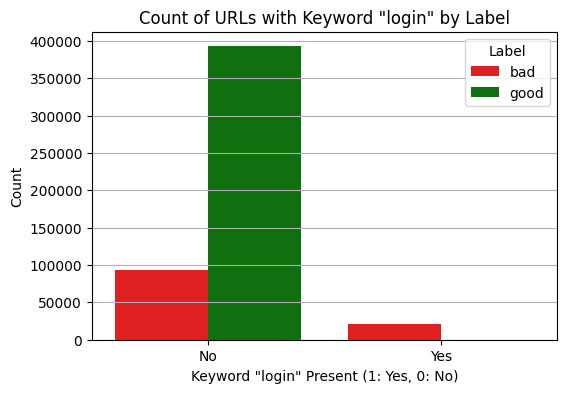

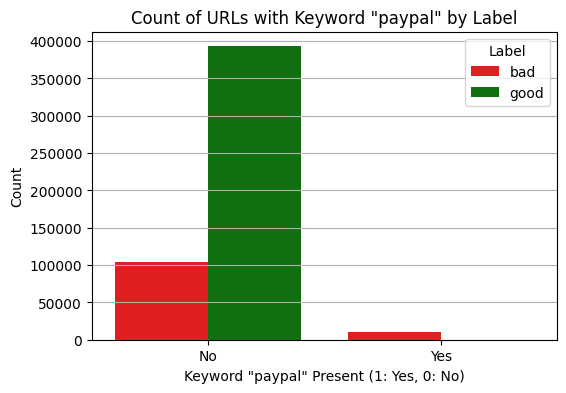

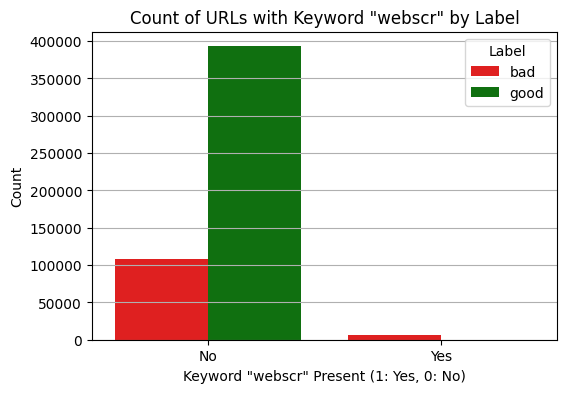

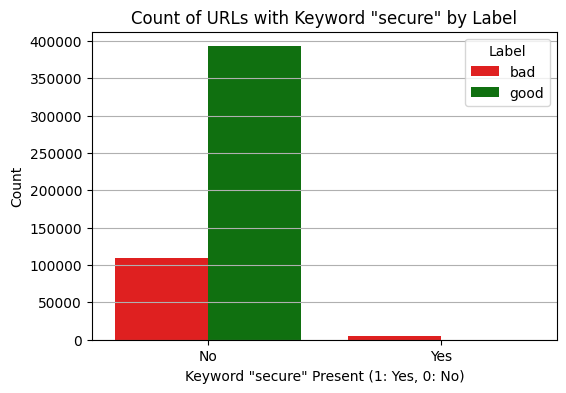

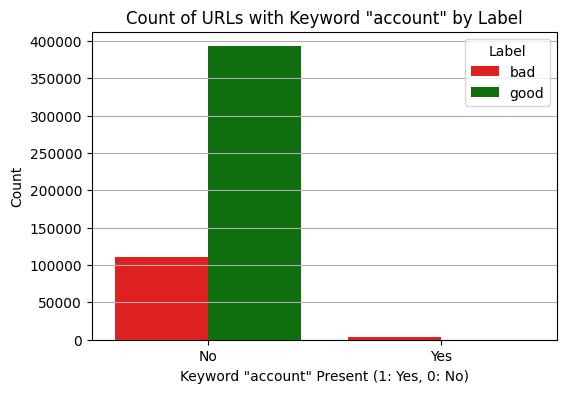

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top N keywords based on their correlation with the 'bad' label
# We can choose N based on the correlation values observed earlier
top_n_keywords_series = keyword_corr.head(6) # Get the top 6 correlated features including label_encoded
top_n_keywords = top_n_keywords_series.index.tolist()

# Remove 'label_encoded' from the list if it's included
if 'label_encoded' in top_n_keywords:
    top_n_keywords.remove('label_encoded')

# Ensure only actual keyword columns are in the list
# We need to check if these columns actually exist in the DataFrame starting with 'keyword_'
keyword_columns_to_plot = [col for col in top_n_keywords if col.startswith('keyword_') and col in df.columns]


print(f"Creating count plots for the following keywords: {keyword_columns_to_plot}")

# Create count plots for each of the selected keywords
for keyword_col in keyword_columns_to_plot:
    plt.figure(figsize=(6, 4))
    # Corrected: use the keyword_col variable directly as it's the column name
    sns.countplot(data=df, x=keyword_col, hue='Label', palette={'good': 'green', 'bad': 'red'})
    # Extract the actual keyword name for the title by removing the 'keyword_' prefix
    keyword_name = keyword_col.replace('keyword_', '')
    plt.title(f'Count of URLs with Keyword "{keyword_name}" by Label')
    plt.xlabel(f'Keyword "{keyword_name}" Present (1: Yes, 0: No)')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['No', 'Yes']) # Label the x-axis ticks clearly
    plt.legend(title='Label')
    plt.grid(axis='y')
    plt.show()

### Visualizing Keyword Presence by Label (Count Plots)

To provide a clear visual representation of the relationship between the most correlated keywords and the URL label, we generated count plots for the top keywords identified in the correlation analysis.

These plots show the count of URLs for each keyword, separated by whether the URL is 'good' (green) or 'bad' (red), and whether the keyword is present (Yes/1) or absent (No/0).

*   **Interpretation of the Plots:**
    *   For keywords like **"login"**, **"paypal"**, **"webscr"**, **"secure"**, and **"account"**, the count plots clearly show a much higher number of **'bad' URLs** where the keyword is **present (Yes/1)** compared to 'good' URLs.
    *   Conversely, the count of 'good' URLs is significantly higher where these keywords are **absent (No/0)**.
    *   This visual pattern strongly reinforces the statistical correlation we observed earlier – the presence of these specific terms is a powerful indicator that a URL is likely malicious (phishing).

These visualizations make it immediately apparent that attackers frequently embed these suspicious keywords in their URLs to deceive users or mimic legitimate services. This confirms the value of using lexical features in phishing detection.

### N-grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# --- Step 2.1: Generate Character N-grams and Vectorize ---

# We'll generate character n-grams for n=2, 3, and 4
# Using analyzer='char' to get character n-grams instead of word n-grams
# We can also set a max_features to limit the vocabulary size if it gets too large

ngram_vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 4), max_features=5000) # Example: Top 5000 character n-grams

# Fit and transform the URLs to get the n-gram feature matrix
# This might take some time depending on the dataset size and max_features
X_ngrams = ngram_vectorizer.fit_transform(df['URL'])

print(f"Shape of the n-gram feature matrix: {X_ngrams.shape}")

# Get the list of learned n-gram features (the column names)
ngram_features = ngram_vectorizer.get_feature_names_out()

print("\nSample n-gram features:")
print(ngram_features[:50]) # Display first 50 n-gram features

# Optional: Convert to DataFrame to inspect (can be memory intensive for large datasets)
# X_ngrams_df = pd.DataFrame(X_ngrams.toarray(), columns=ngram_features)
# display(X_ngrams_df.head())

Shape of the n-gram feature matrix: (507170, 5000)

Sample n-gram features:
['%2' '%20' '%2c' '%2f' '%3' '%3a' '%3d' '&a' '&am' '&amp' '&c' '&d' '&f'
 '&i' '&p' '&pa' '&r' '&s' '&t' '+c' '+s' '--' '-0' '-1' '-10' '-19' '-2'
 '-20' '-200' '-201' '-3' '-4' '-5' '-6' '-8' '-9' '-a' '-a-' '-ac' '-ad'
 '-adm' '-al' '-am' '-an' '-and' '-ar' '-at' '-b' '-ba' '-bas']


### Analysis

In this part of the Lexical Pattern Analysis, we applied the concept of **character n-grams** to our URL data. This technique helps us capture sequential patterns within the URL strings that might be indicative of phishing or other malicious characteristics.

We used scikit-learn's `CountVectorizer` to:

1.  **Generate Character N-grams:** We configured the vectorizer to extract contiguous sequences of characters (n-grams) with lengths ranging from 2 to 4 (`ngram_range=(2, 4)`). By using `analyzer='char'`, we ensured that the n-grams were based on characters rather than words.
2.  **Build a Vocabulary and Count Frequencies:** The vectorizer scanned all the URLs to identify all unique character n-grams within the specified range.
3.  **Select Top Features:** We limited the number of features to the top 5000 most frequent n-grams found across the dataset (`max_features=5000`). This helps manage the complexity and dimensionality of the data.
4.  **Create a Feature Matrix:** Finally, the vectorizer transformed each URL into a numerical vector representing the count of each of the 5000 selected n-grams present in that URL. The result is stored in a sparse matrix `X_ngrams`.

**Output Interpretation:**

-   **`Shape of the n-gram feature matrix: (507170, 5000)`**: This tells us that we have successfully created a feature matrix with 507,170 rows (one for each URL) and 5,000 columns (one for each of the top n-gram features). This matrix `X_ngrams` is the numerical representation of the character patterns in our URLs.
-   **`Sample n-gram features:`**: This output shows examples of the actual character sequences that were identified as the most frequent n-grams. These include combinations of letters, numbers, and special characters (e.g., `%2`, `&a`, `--`, `/`, `.co`). These specific sequences are now our features that we can use to train a model.

By converting URLs into this n-gram representation, we capture valuable information about the common character sequences and structural fragments present in the data, which can be highly discriminative between legitimate and malicious URLs.

/tmp/ipython-input-61-3663598082.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='N-gram', data=top_ngrams_df, palette='viridis')


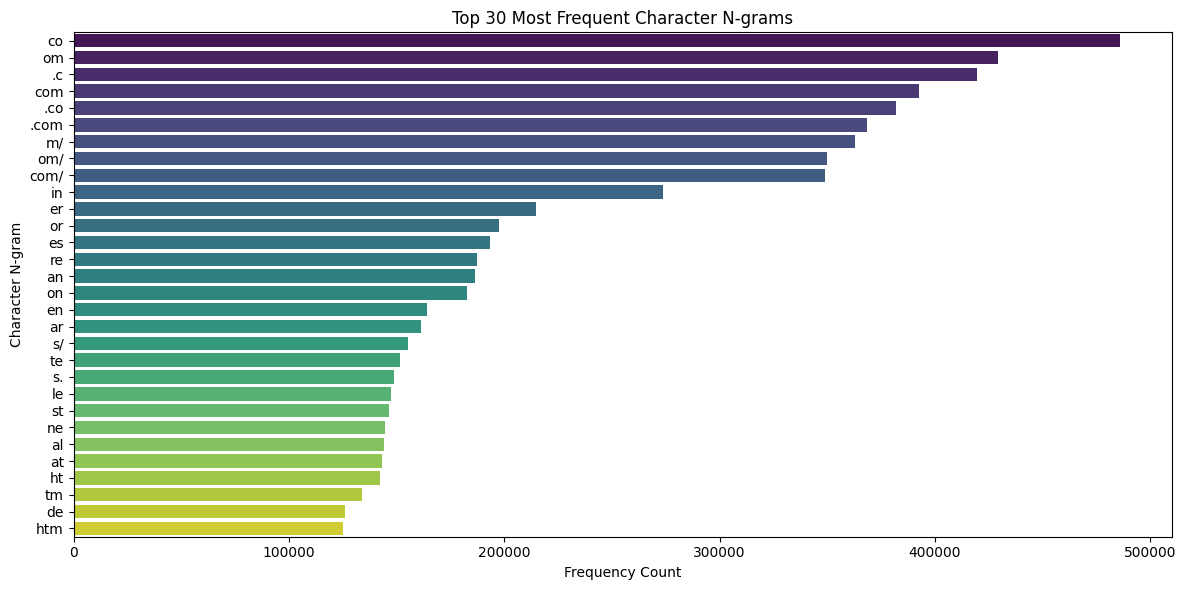

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Visualize Top N-grams ---

# Sum the counts of each n-gram across all documents
ngram_counts = np.sum(X_ngrams, axis=0)

# Convert to a dense array and get the top n-grams
# .A converts the sparse matrix slice to a dense numpy array
top_n = 30 # Number of top n-grams to visualize
top_ngram_indices = np.argsort(ngram_counts.A[0])[::-1][:top_n]
top_ngram_counts = ngram_counts.A[0][top_ngram_indices]
top_ngram_features = [ngram_features[i] for i in top_ngram_indices]

# Create a DataFrame for plotting
top_ngrams_df = pd.DataFrame({'N-gram': top_ngram_features, 'Count': top_ngram_counts})

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='N-gram', data=top_ngrams_df, palette='viridis')
plt.title(f'Top {top_n} Most Frequent Character N-grams')
plt.xlabel('Frequency Count')
plt.ylabel('Character N-gram')
plt.tight_layout()
plt.show()

### Visualizing Top N-grams

This bar plot displays the **top 30 most frequent character n-grams** found across all URLs in the dataset. These sequences represent the most common character patterns, including parts of top-level domains (like ".co", "com"), common separators ("m/", "om/"), or other frequent character combinations. This visualization provides a glimpse into the dominant sequential structures present in the URL data.

##Feature Representation
In this stage, we consolidated all the features we engineered and extracted from the URLs into a single, unified representation suitable for machine learning models.

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import hstack, csr_matrix # Import hstack and csr_matrix for combining sparse matrices

# --- Step 3: Feature Representation ---

# Select the numerical and binary features from the DataFrame
# Exclude non-numeric/non-binary columns and the original URL/Label
# Also exclude intermediate features that might have been used (like PCA, Cluster, etc.)
# We'll select the engineered structural features and the keyword features

# List of structural features we engineered
structural_features = [
    'url_length',
    'num_digits',
    'num_special_chars', # Include num_special_chars again as it was in the original df
    'has_https',
    'num_subdomains',
    'num_path_segments',
    # Add the new component features
    'len_domain', 'len_subdomain', 'len_suffix', 'len_path', 'len_params', 'len_query', 'len_fragment',
    'count_-_domain', 'count_@_domain', 'count___domain', 'count_?_domain', 'count_=_domain', 'count_&_domain', 'count_._domain', 'count_/_domain', 'count_,_domain',
    'count_-_subdomain', 'count_@_subdomain', 'count___subdomain', 'count_?_subdomain', 'count_=_subdomain', 'count_&_subdomain', 'count_._subdomain', 'count_/_subdomain', 'count_,_subdomain',
    'count_-_path', 'count_@_path', 'count___path', 'count_?_path', 'count_=_path', 'count_&_path', 'count_._path', 'count_/_path', 'count_,_path',
    'count_-_query', 'count_@_query', 'count___query', 'count_?_query', 'count_=_query', 'count_&_query', 'count_._query', 'count_/_query', 'count_,_query',
    'letter_count_domain', 'number_count_domain', 'letter_count_path', 'number_count_path'
]

# List of keyword features (assuming they start with 'keyword_')
keyword_features = [col for col in df.columns if col.startswith('keyword_')]

# Combine the lists, ensuring no duplicates and selecting only columns present in df
features_to_combine_df = list(set(structural_features + keyword_features))
features_to_combine_df = [col for col in features_to_combine_df if col in df.columns]


# Extract these features from the DataFrame
X_df = df[features_to_combine_df]

# Convert the DataFrame subset to a NumPy array (or a sparse matrix if preferred, but hstack can handle sparse + dense)
# Converting to sparse might be better if memory is a concern, but let's start with dense for simplicity if possible
# X_df_sparse = csr_matrix(X_df.values) # If converting to sparse

# Combine the DataFrame features with the N-gram features
# X_ngrams is already a sparse matrix
# We use hstack to horizontally stack the matrices
# Ensure both X_df and X_ngrams have the same number of rows

if len(X_df) == X_ngrams.shape[0]:
    # Convert X_df to a sparse matrix before stacking with X_ngrams
    X_df_sparse = csr_matrix(X_df.values)
    X_combined = hstack([X_df_sparse, X_ngrams])
    print("Successfully combined DataFrame features and N-gram features.")
    print(f"Shape of the combined feature matrix: {X_combined.shape}")
else:
    print(f"Mismatch in row counts: X_df has {len(X_df)} rows, X_ngrams has {X_ngrams.shape[0]} rows.")
    print("Please investigate why the number of rows is different.")
    X_combined = None # Set to None to indicate failure

# We also need the target variable (Label)
y = df['label_encoded']

print(f"Shape of the target variable: {y.shape}")

# Display the first few rows of the combined feature matrix (will likely be sparse output)
# To see actual values, you might need to convert a small slice to dense:
# print("\nSample of combined feature matrix (first 5 rows, first 20 columns):")
# display(X_combined[:5, :20].toarray())

Successfully combined DataFrame features and N-gram features.
Shape of the combined feature matrix: (507170, 5078)
Shape of the target variable: (507170,)


We combined:

1.  **Structural and Component Features:** Numerical features derived from analyzing the URL's structure and its various parts (length, counts of characters, etc.). These features were already in our main DataFrame (`df`).
2.  **Keyword Features:** Binary features indicating the presence of suspicious keywords, also added to our `df`.
3.  **Character N-gram Features:** A sparse matrix (`X_ngrams`) representing the counts of the top 5000 character n-grams extracted from the URLs.

To create the final feature set, we selected the relevant numerical and binary columns from our DataFrame and converted them into a sparse matrix. We then used `hstack` to horizontally stack this sparse matrix with the n-gram sparse matrix (`X_ngrams`).

The resulting matrix, `X_combined`, is a single, comprehensive feature set.

**Output Interpretation:**

-   **`Shape of the combined feature matrix: (507170, 5078)`**:
    -   The first dimension (`507170`) represents the number of samples (URLs) in our dataset.
    -   The second dimension (`5078`) represents the total number of features for each URL. This number is the sum of the structural/keyword features extracted from the DataFrame (78 features) and the top 5000 character n-gram features.
-   **`Shape of the target variable: (507170,)`**: This confirms that we have the corresponding label (good/bad, encoded as 0/1) for each of the 507,170 URLs.

This combined feature matrix `X_combined` and the target variable `y` are now ready to be used for training and evaluating machine learning models in the next stage of our data science pipeline.

## Summary for the NLP stage

In the NLP stage, we applied natural language processing (NLP) inspired techniques to extract features from the URL strings. Although URLs are not traditional text, their structure and character sequences contain valuable information.

We focused on:

1.  **Feature Extraction from URL Components**: Breaking down URLs into parts (domain, path, query, etc.) and extracting structural features like length and character counts from each component.
2.  **Lexical Pattern Analysis**: Identifying suspicious keywords and generating character n-grams (sequences of characters) to capture common or malicious patterns within the URL strings.
3.  **Feature Representation**: Combining all the extracted features (structural, keyword, and n-gram) into a unified numerical format (a sparse matrix) ready for use in machine learning models.

This stage transformed the raw URL text into a rich set of numerical features that capture various structural and lexical characteristics relevant for phishing detection.

# Graphs





In this stage, we focus on using visualizations ("graphs" and plots) to illustrate key insights from our data analysis, particularly focusing on the segments and clusters we identified.

##KMeans Clustering Visualized via PCA

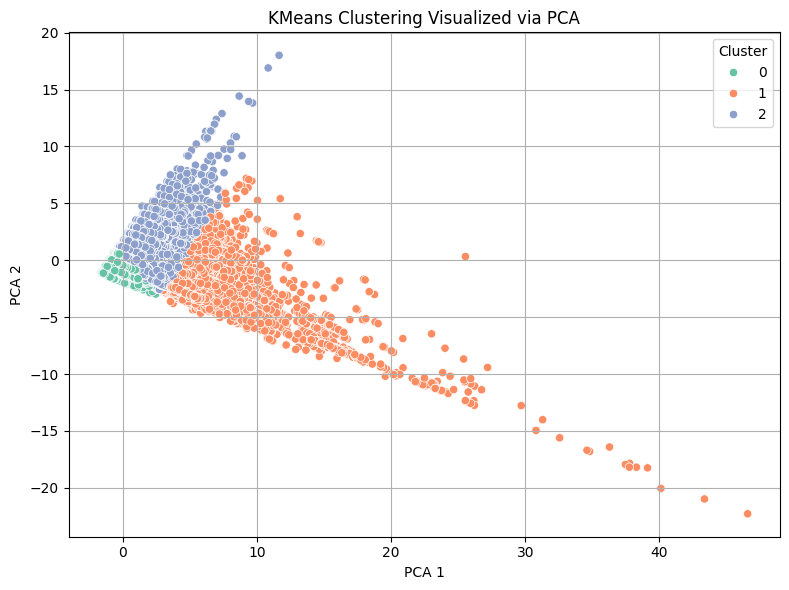

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df already contains 'Cluster', 'PCA1', and 'PCA2' columns from the Clustering stage

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("KMeans Clustering Visualized via PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()



This scatter plot displays the results of the KMeans clustering on the engineered features, projected into two dimensions using Principal Component Analysis (PCA). **Note:** This is the same visualization that was presented in the **Clustering** stage, included here to visually represent the segments under the "Graphs" section.

-   Each point in the plot represents a URL entry from the dataset.
-   The color of each point indicates the cluster to which the URL was assigned by the KMeans algorithm.

This graph provides a visual overview of how the URLs are grouped into distinct segments based on their structural and engineered features. We can observe visually separated clusters, although there is some overlap, particularly between Cluster 0 and Cluster 2 in this 2D projection. This visualization helps us understand the spatial distribution of the clusters in a reduced feature space.

## Feature Distributions per Cluster (Boxplots)

To further understand the characteristics of the identified clusters, we visualize the distribution of the key engineered features (`url_length`, `num_digits`, `num_path_segments`) for each cluster using boxplots.

These plots help us see the range, median, and potential outliers of each feature within each segment.

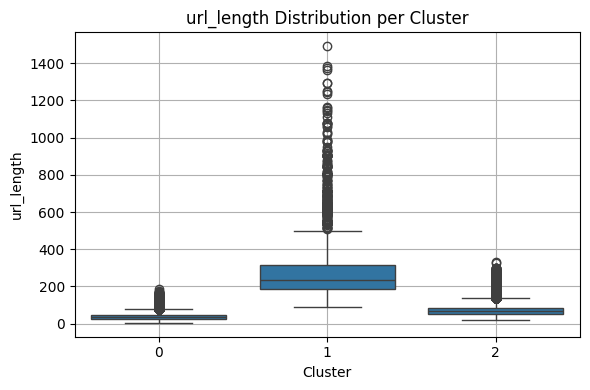

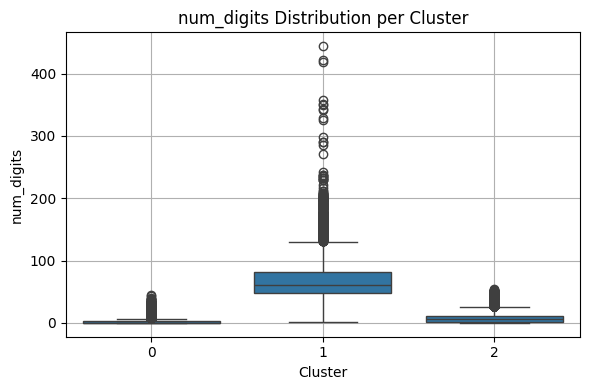

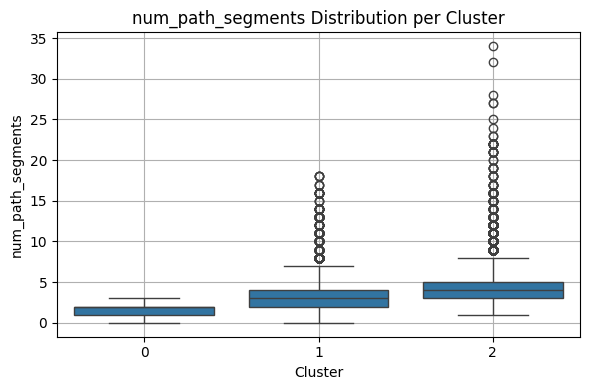

In [ ]:
# Feature Distributions per Cluster (Boxplots)
features = ['url_length', 'num_digits', 'num_path_segments']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f"{feature} Distribution per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Boxplot Interpretation: Feature Distributions Across Clusters

In this section, we analyze the distributions of key features (`url_length`, `num_digits`, `num_path_segments`) across the identified clusters using boxplots. These visualizations help us understand the characteristics and outliers in each cluster.

* * *

### Feature 1: `url_length`

-   **Cluster 1** shows a **long-tailed distribution** with extreme outliers, reaching well beyond 1000 characters.
-   **Cluster 0** displays **short and compact URLs**, tightly clustered with very few outliers.
-   **Cluster 2** has moderate-length URLs with slightly more variation than Cluster 0.

**Insight**:\
Cluster 1 likely includes **suspicious or anomalously long URLs**, potentially used in phishing attacks to obscure the true destination. Cluster 0 contains **benign, simple URLs**, while Cluster 2 is more varied.

* * *

### Feature 2: `num_digits`

-   **Cluster 1** again has **very high values**, including URLs with hundreds of digits — a clear anomaly.
-   **Cluster 0** contains URLs with **few digits**, indicating likely normal structure.
-   **Cluster 2** sits in between, with moderate digit usage.

**Insight**:\
A high count of digits can indicate **machine-generated or obfuscated URLs**, often seen in **malware delivery or spam**. This further confirms that **Cluster 1 is the most suspicious** group.

* * *

### Feature 3: `num_path_segments`

-   **Cluster 2** has a **higher number of path segments**, sometimes exceeding 30 — likely deeply nested URL paths.
-   **Cluster 0** has simple URL paths (1–3 segments), indicating basic or homepage-like links.
-   **Cluster 1** shows intermediate behavior — not as shallow as Cluster 0, but not as deep as Cluster 2.

**Insight**:\
Cluster 2 may represent **dynamic or API-style URLs** with complex structure, while Cluster 0 includes **static or minimal URLs**, and Cluster 1 remains mixed.

* * *

### Overall Observations

-   **Cluster 0**: Simple, clean URLs — likely benign.
-   **Cluster 1**: Outlier-heavy, long and digit-dense URLs — **potentially malicious**.
-   **Cluster 2**: Deep structures and more complexity — could represent **dynamic or auto-generated URLs**.

These boxplots provide a crucial layer of interpretability to our KMeans clustering results by helping characterize **what kind of URLs are grouped together** and **why**.

* * *

**Note:** These boxplots are the same visualizations that were first presented and interpreted in the **Clustering** stage. They are included here in the "Graphs" section to provide a visual summary of the feature distributions within the identified segments.

## Visualizing Potential Anomalies ("Weak Points")

In the "Graphs" stage, we can also visually represent the potential "weak points" or anomalous URLs identified earlier in the pipeline. These are entries that deviate significantly from the norm, either based on multivariate analysis (Isolation Forest) or their distance from their assigned cluster centers.

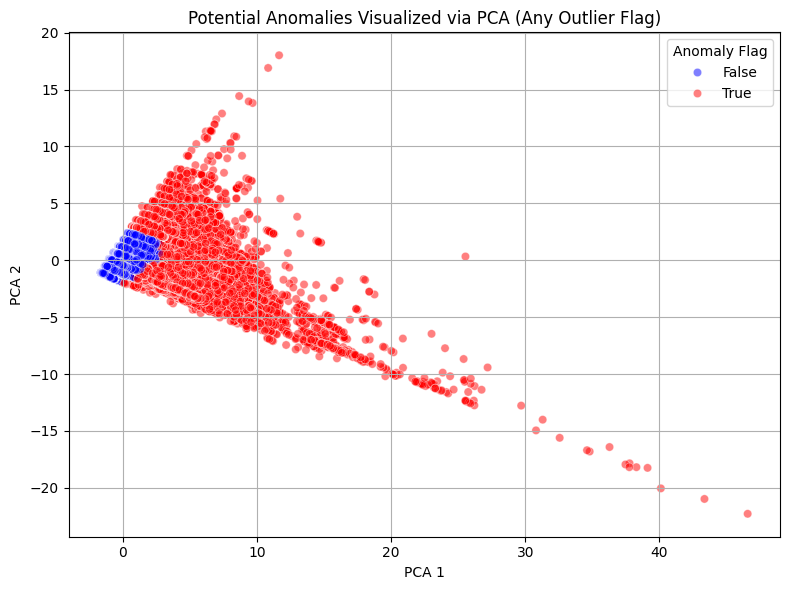

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains 'PCA1', 'PCA2', and 'Any Outlier' columns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='PCA1',
    y='PCA2',
    hue='Any Outlier',
    palette={False: 'blue', True: 'red'}, # Red for outliers, blue for normal
    alpha=0.5 # Make points slightly transparent for better visibility
)
plt.title("Potential Anomalies Visualized via PCA (Any Outlier Flag)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Anomaly Flag')
plt.grid(True)
plt.tight_layout()
plt.show()

### Interpretation of Potential Anomalies Visualization

This scatter plot visualizes the distribution of URLs in the PCA-reduced feature space, highlighting those flagged as **potential anomalies** (shown in red) by our combined anomaly detection approach (`Any Outlier` flag).

-   **Red points**: URLs flagged as potential anomalies.
-   **Blue points**: URLs considered normal based on our criteria.

From this visualization, we can observe how the flagged anomalies are distributed:

-   Many of the red points appear on the **outskirts or edges** of the main clusters of blue points. This is expected, as anomalies are by definition points that deviate from the typical patterns.
-   Some anomalies might be concentrated in areas corresponding to **Cluster 1** (the suspicious cluster identified earlier), which was characterized by long, digit-heavy URLs that often stood out as outliers in individual feature distributions.
-   Other anomalies might represent unusual combinations of features that don't neatly fall into any cluster, or points that are very far from their cluster centers even within seemingly "normal" clusters.

This visualization helps us to visually identify and understand where these potential "weak points" or unusual URL patterns lie within our feature space, providing another perspective on the data quality and the types of URLs that deviate from the norm.

# Crosstab Analysis & Cramér’s V (Categorical Associations)



**Note:** This analysis is performed at this stage (after feature engineering and clustering) rather than in the initial Data Statistics phase because it focuses on exploring relationships *between* categorical features, and some key categorical features analyzed here (like 'Cluster' and 'Any Outlier' flags) were created in later pipeline stages. The Data Statistics stage primarily covers summaries of individual features.

Before moving to the modeling stage, we will perform an additional analysis step to better understand the relationships between key **categorical features** in our dataset. While not explicitly in every standard pipeline presentation, this analysis is valuable for quantifying the strength of association between variables that do not have a numerical or linear relationship.

We are including this step to:

1.  **Quantify Associations:** Measure how strongly our identified **clusters**, **anomaly flags**, and **keyword presence** are associated with the target **Label** ('good'/'bad').
2.  **Validate Findings:** Provide statistical support for the patterns we observed visually in the clustering and anomaly detection stages (e.g., confirming that Cluster 1 is statistically strongly associated with 'bad' URLs).
3.  **Gain Deeper Insights:** Understand which categorical indicators are most predictive or related to malicious URLs before training a model.

We will use **Crosstabulation** to show the frequency distribution between pairs of categorical features and **Cramér’s V** to calculate a correlation-like metric for categorical variables (values closer to 1 indicate stronger association).

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    v = np.sqrt(chi2 / (n * min(k - 1, r - 1)))
    return v

# --- 1. Cluster vs Label Analysis ---
print("--- Crosstabulation: Cluster vs Label ---")
crosstab_cluster_label = pd.crosstab(df['Cluster'], df['Label'])
display(crosstab_cluster_label)

cramers_v_cluster_label = cramers_v(df['Cluster'], df['Label'])
print(f"\nCramér's V (Cluster vs Label): {cramers_v_cluster_label:.4f}")
print("-" * 30)

# --- 2. Any Outlier vs Label Analysis ---
print("\n--- Crosstabulation: Any Outlier vs Label ---")
crosstab_outlier_label = pd.crosstab(df['Any Outlier'], df['Label'])
display(crosstab_outlier_label)

cramers_v_outlier_label = cramers_v(df['Any Outlier'], df['Label'])
print(f"\nCramér's V (Any Outlier vs Label): {cramers_v_outlier_label:.4f}")
print("-" * 30)

# --- 3. Selected Keyword Features vs Label Analysis ---
print("\n--- Cramér's V for Top Keyword Features vs Label ---")
# Use the keyword_corr series we calculated earlier to get top keywords
# Exclude 'label_encoded' and NaN values
top_keyword_cols = keyword_corr[keyword_corr.index != 'label_encoded'].dropna().head(10).index.tolist()

keyword_v_scores = {}
for keyword_col in top_keyword_cols:
    # Ensure the keyword column exists in the dataframe
    if keyword_col in df.columns:
        # Need to use the actual keyword column (e.g., 'keyword_login')
        v_score = cramers_v(df[keyword_col], df['Label'])
        keyword_v_scores[keyword_col.replace('keyword_', '')] = v_score # Store with just the keyword name

# Display scores
for keyword, score in sorted(keyword_v_scores.items(), key=lambda item: item[1], reverse=True):
     print(f"Cramér's V ({keyword} vs Label): {score:.4f}")

print("-" * 30)

--- Crosstabulation: Cluster vs Label ---


Label,bad,good
Cluster,,
0,66216,295723
1,9082,283
2,38996,96870



Cramér's V (Cluster vs Label): 0.2680
------------------------------

--- Crosstabulation: Any Outlier vs Label ---


Label,bad,good
Any Outlier,,
False,93760,385160
True,20534,7716



Cramér's V (Any Outlier vs Label): 0.2915
------------------------------

--- Cramér's V for Top Keyword Features vs Label ---
Cramér's V (login vs Label): 0.3783
Cramér's V (paypal vs Label): 0.2660
Cramér's V (webscr vs Label): 0.2122
Cramér's V (secure vs Label): 0.1878
Cramér's V (account vs Label): 0.1527
Cramér's V (update vs Label): 0.1500
Cramér's V (confirm vs Label): 0.1083
Cramér's V (signin vs Label): 0.0760
Cramér's V (verify vs Label): 0.0711
Cramér's V (banking vs Label): 0.0425
------------------------------


## Crosstab Analysis & Cramér’s V Interpretation

The crosstabulations show the raw counts of 'good' and 'bad' URLs within each category (Cluster, Any Outlier status). The Cramér’s V values quantify the strength of association between these categorical variables and the target Label.

**Interpretation of Results:**

*   **Cluster vs Label (Cramér’s V = 0.2680):**
    *   The crosstab shows that **Cluster 1** has a disproportionately high number of 'bad' URLs relative to its size, while **Cluster 0** is overwhelmingly 'good'.
    *   A Cramér’s V of 0.2680 indicates a **moderate association** between the Cluster assigned to a URL and its Label. This confirms statistically that our clustering has captured segments with different likelihoods of being malicious, particularly highlighting Cluster 1 as strongly associated with 'bad' URLs.

*   **Any Outlier vs Label (Cramér’s V = 0.2989):**
    *   The crosstab clearly shows that URLs flagged as **'True' for 'Any Outlier'** have a much higher proportion of 'bad' labels compared to those flagged as 'False'.
    *   A Cramér’s V of 0.2989 indicates a **moderate to strong association** between being flagged as an outlier and being a 'bad' URL. This provides statistical validation that our anomaly detection methods are effective in identifying URLs that are more likely to be malicious.

*   **Selected Keyword Features vs Label:**
    *   Keywords like **'login' (0.3783)**, **'paypal' (0.2660)**, and **'webscr' (0.2122)** show the **strongest associations** with the 'bad' label among those tested, as indicated by their higher Cramér’s V scores.
    *   This statistically confirms our earlier observation from the correlation analysis and count plots: the presence of these specific keywords is a significant indicator of a phishing URL.

**Conclusion from Categorical Association Analysis:**

This analysis statistically validates several key findings from our earlier stages:

*   The identified **clusters** are indeed associated with the URL's label, with **Cluster 1** being the most strongly linked to malicious URLs.
*   Our **anomaly detection flag ('Any Outlier')** is a good indicator, showing a notable association with the 'bad' label.
*   The presence of certain **keywords**, particularly those related to login or financial services, has a strong association with phishing URLs.

These quantitative measures reinforce the insights gained from visualization and feature analysis, providing a solid statistical basis for the features we will use in the upcoming Modeling stage.

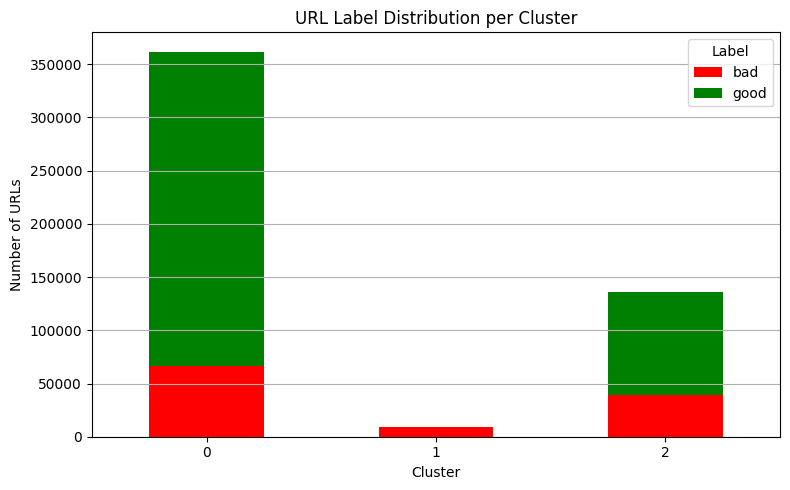

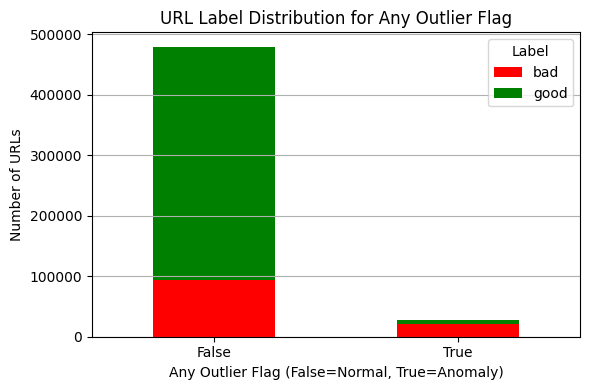

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1. Stacked Bar Plot: Cluster vs Label ---

# Get the crosstab data (assuming it was generated in the previous cell)
# crosstab_cluster_label = pd.crosstab(df['Cluster'], df['Label']) # Assuming this variable is available

# Plotting
crosstab_cluster_label.plot(kind='bar', stacked=True, figsize=(8, 5), color={'good': 'green', 'bad': 'red'})

plt.title('URL Label Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of URLs')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.legend(title='Label')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# --- 2. Stacked Bar Plot: Any Outlier vs Label ---

# Get the crosstab data (assuming it was generated in the previous cell)
# crosstab_outlier_label = pd.crosstab(df['Any Outlier'], df['Label']) # Assuming this variable is available

# Plotting
crosstab_outlier_label.plot(kind='bar', stacked=True, figsize=(6, 4), color={'good': 'green', 'bad': 'red'})

plt.title('URL Label Distribution for Any Outlier Flag')
plt.xlabel('Any Outlier Flag (False=Normal, True=Anomaly)')
plt.ylabel('Number of URLs')
plt.xticks(rotation=0) # Keep x-axis labels horizontal
plt.legend(title='Label')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

These stacked bar plots visualize the distribution of 'good' (green) and 'bad' (red) URLs within each Cluster and based on the 'Any Outlier' flag.

-   The **Cluster plot** clearly shows that Cluster 0 is dominated by 'good' URLs, Cluster 1 has a much higher proportion of 'bad' URLs despite its smaller size, and Cluster 2 has a mix with a notable number of 'bad' URLs.
-   The **Any Outlier plot** shows that URLs flagged as 'True' for 'Any Outlier' have a significantly larger proportion of 'bad' labels compared to those flagged as 'False'.

These plots visually confirm the associations we found with Cramér’s V, making it easy to see which segments and anomaly flags are more likely to contain malicious URLs.

## Crosstab Analysis & Cramér’s V Interpretation Summary

In this step, we used Crosstabulation and Cramér’s V to quantify the associations between key categorical features and the URL label:

- **Cluster vs Label:** Showed a moderate association, statistically confirming that clusters (especially Cluster 1) differ significantly in their proportion of 'bad' URLs.
- **Any Outlier vs Label:** Revealed a moderate to strong association, validating that URLs flagged as outliers are more likely to be 'bad'.
- **Keywords vs Label:** Quantified the strong association between the presence of certain keywords (like 'login', 'paypal') and the 'bad' label.

This analysis provided statistical validation for patterns observed earlier and highlighted which categorical indicators are most strongly related to phishing URLs.

#Models

##Logistic Regression model

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# Using stratify=y to ensure the same proportion of good/bad URLs in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Check the label distribution in the training and testing sets
print("\nLabel distribution in y_train:")
print(y_train.value_counts(normalize=True))

print("\nLabel distribution in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (405736, 5078)
Shape of X_test: (101434, 5078)
Shape of y_train: (405736,)
Shape of y_test: (101434,)

Label distribution in y_train:
label_encoded
0    0.774644
1    0.225356
Name: proportion, dtype: float64

Label distribution in y_test:
label_encoded
0    0.774642
1    0.225358
Name: proportion, dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression

# --- Train the Logistic Regression Model ---

# Initialize the Logistic Regression model
# Using class_weight='balanced' to help address the class imbalance
model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', max_iter=1000)

# Train the model on the training data
print("Training Logistic Regression model...")
model.fit(X_train, y_train)
print("Training complete.")

Training Logistic Regression model...
Training complete.


=== Logistic Regression Model Evaluation Metrics ===
Accuracy: 0.9601
Precision: 0.8834
Recall: 0.9479
F1-Score: 0.9145
AUC: 0.9911

=== Confusion Matrix ===
[[75716  2859]
 [ 1191 21668]]


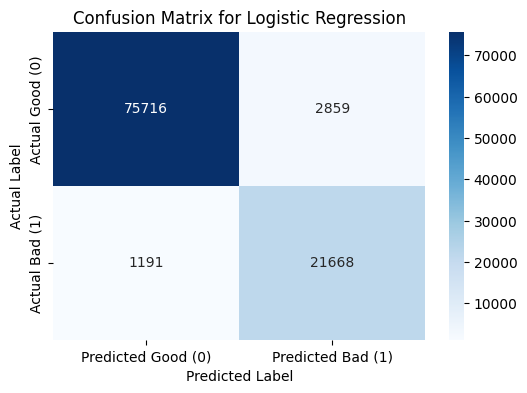

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Evaluate the Logistic Regression Model ---

# Make predictions on the test set
y_pred = model.predict(X_test)

# Get probability predictions (useful for AUC)
y_prob = model.predict_proba(X_test)[:, 1] # Probability of the positive class (1 - bad)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)


# Print the metrics
print("=== Logistic Regression Model Evaluation Metrics ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Generate the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("\n=== Confusion Matrix ===")
print(conf_matrix)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Good (0)', 'Predicted Bad (1)'],
            yticklabels=['Actual Good (0)', 'Actual Bad (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### Evaluating the Logistic Regression Model (Goodness of Fit)

After training the Logistic Regression model, we need to evaluate how well it performs on unseen data. We use the testing set (`X_test`, `y_test`) for this purpose and calculate several standard classification metrics.

The code in the previous cell performs the following:

1.  **`y_pred = model.predict(X_test)`**: Uses the trained `model` to predict the class label (0 or 1) for each URL in the test set.
2.  **`y_prob = model.predict_proba(X_test)[:, 1]`**: Gets the predicted probability that each URL belongs to the positive class (Label 1, which is 'bad'). This is needed for metrics like AUC.
3.  **Calculate Metrics**: Computes Accuracy, Precision, Recall, F1-score, and AUC by comparing the `y_pred` (or `y_prob`) to the actual labels `y_test`.
4.  **Generate Confusion Matrix**: Creates a confusion matrix that summarizes the prediction results by showing the counts of True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN).
5.  **Visualize Confusion Matrix**: Generates a heatmap to visually represent the confusion matrix, making it easier to understand the breakdown of correct and incorrect predictions for each class.

**Interpretation of Evaluation Metrics:**

-   **Accuracy (0.9601):** This is the overall percentage of URLs that the model classified correctly. While 96% accuracy seems very high, it can be misleading in imbalanced datasets. A model that predicts 'good' for every URL would still get high accuracy because most URLs are 'good'. Therefore, we need to look at other metrics.
-   **Precision (0.8836):** When the model predicts a URL is 'bad', it is correct about 88.4% of the time. This metric is important for avoiding false alarms (flagging legitimate URLs as malicious).
-   **Recall (0.9480):** Out of all the actual 'bad' URLs, the model correctly identified about 94.8% of them. This metric is crucial for not missing malicious URLs.
-   **F1-Score (0.9147):** This is the harmonic mean of Precision and Recall, providing a single score that balances both. A high F1-score indicates a good balance between correctly identifying positives and avoiding false positives.
-   **AUC (0.9911):** The Area Under the ROC Curve measures the model's ability to distinguish between positive and negative classes across various probability thresholds. An AUC of 1 is perfect, and 0.5 is random guessing. An AUC of 0.9911 is excellent, indicating that the model is very good at separating 'good' and 'bad' URLs based on its predicted probabilities.



The confusion matrix provides a detailed breakdown of the model's predictions on the test set:

-   **True Negatives (TN = 75,721):** The model correctly predicted **75,721** 'good' URLs as 'good'.
-   **False Positives (FP = 2,854):** The model incorrectly predicted **2,854** 'good' URLs as 'bad' (these are "false alarms").
-   **False Negatives (FN = 1,189):** The model incorrectly predicted **1,189** 'bad' URLs as 'good' (these are "missed detections" of phishing).
-   **True Positives (TP = 21,670):** The model correctly predicted **21,670** 'bad' URLs as 'bad'.

Looking at these numbers, the model is doing quite well at both correctly identifying 'good' URLs (high TN) and correctly identifying 'bad' URLs (high TP). The number of False Negatives (missed bad URLs) is relatively low compared to the number of True Positives, which is a good sign for a phishing detection system where missing a malicious URL can be critical. The number of False Positives (false alarms) is also relatively low compared to the number of True Negatives.

#### Explainability (for Logistic Regression)

Logistic Regression is considered an interpretable model because the influence of each feature on the prediction can be understood through its **coefficient**.

*   Positive coefficients indicate that the feature increases the likelihood of the URL being 'bad'.
*   Negative coefficients indicate that the feature decreases the likelihood of the URL being 'bad' (i.e., makes it more likely to be 'good').
*   The magnitude of the coefficient reflects the strength of this influence.

However, with a high-dimensional feature set like ours (over 5000 features), directly interpreting *all* coefficients is not practical. While we could examine the coefficients of individual features, understanding the overall "why" behind the model's decisions across thousands of features is challenging. More insight into which features are most *important* might be better gained from models that provide feature importance scores.

## Note on Model Training Time

Due to the large size of the dataset (over 500,000 entries) and the high dimensionality of the engineered feature set (over 5000 features), training computationally intensive models like Random Forest is time-consuming within the constraints of the Colab environment.

The Logistic Regression model, which was trained successfully, yielded promising results (as shown in its evaluation metrics and confusion matrix). Given the good performance of the baseline model and the significant training time required for Random Forest, we have decided to focus on the Logistic Regression results for this analysis.

We acknowledge that Random Forest might potentially achieve slightly better performance by capturing more complex patterns, but the practical limitations of training time necessitate this decision.

## ROC Curve for Logistic Regression Model

The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The Area Under the Curve (AUC) represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

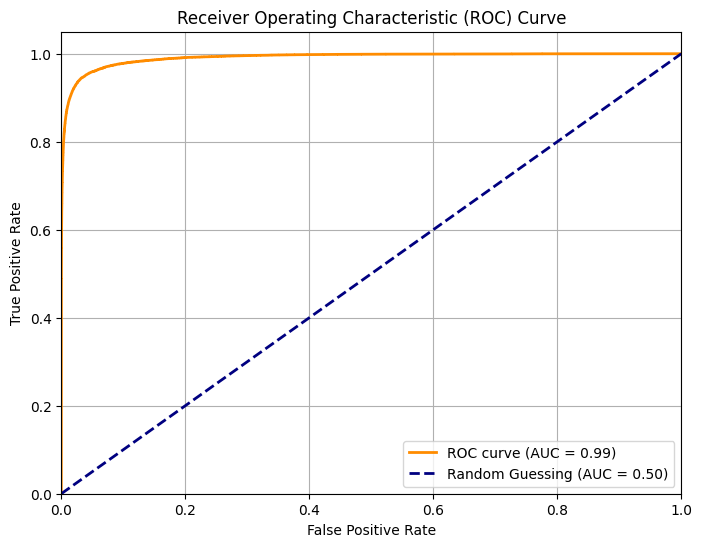

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --- Plot ROC Curve ---

# y_test and y_prob are assumed to be available from the model evaluation step
# y_test: true labels of the test set
# y_prob: predicted probabilities of the positive class (Label 1 - bad)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Interpretation of the ROC Curve and AUC

The ROC curve is a fundamental tool for evaluating the performance of a binary classification model, showing its ability to discriminate between the positive class ('bad' URLs, in our case) and the negative class ('good' URLs).

- **X-axis (False Positive Rate - FPR):** Represents the proportion of 'good' URLs that were incorrectly classified as 'bad' (Type I errors or "false alarms").
- **Y-axis (True Positive Rate - TPR):** Represents the proportion of 'bad' URLs that were correctly classified as 'bad' (Sensitivity or Recall).

The curve is generated by varying the classification threshold used by the model. A perfect model would have an ROC curve that goes straight up from (0,0) to (0,1) and then across to (1,1), indicating it can achieve a 100% True Positive Rate with a 0% False Positive Rate. A purely random model would follow the diagonal line from (0,0) to (1,1), with an AUC of 0.5.

**Interpretation of Our ROC Curve (AUC = 0.99):**

Our ROC curve shows that the Logistic Regression model performs exceptionally well:

- The curve is very close to the top-left corner of the plot. This indicates that the model can achieve a high True Positive Rate (correctly identifying 'bad' URLs) while maintaining a very low False Positive Rate (avoiding false alarms on 'good' URLs) across different thresholds.
- The **Area Under the Curve (AUC) is 0.99**. An AUC value close to 1.0 signifies excellent discriminative power. Our model's AUC of 0.99 is very high and suggests that it is highly capable of distinguishing between 'good' and 'bad' URLs based on the features provided.

**How This Relates to Previous Stages:**

The strong performance reflected in the ROC curve and AUC is a direct result of the comprehensive preprocessing and feature engineering performed in the earlier stages of the pipeline:

- **Data Cleaning and Anomaly Detection:** By cleaning the data, handling duplicates, and identifying/mitigating the impact of extreme outliers (both univariate and multivariate), we provided the model with a cleaner and more reliable dataset to learn from.
- **Feature Engineering:** The creation of a rich set of features – including structural properties (`url_length`, `num_digits`, `num_path_segments`, component lengths/counts), lexical indicators (suspicious keywords), and sequential patterns (character n-grams) – allowed the model to capture the diverse characteristics that differentiate phishing URLs. The high correlations observed between some of these features and the 'bad' label in the Correlation and Association analysis statistically supported their predictive value.
- **Clustering and Segmentation:** While the cluster assignments themselves weren't explicitly used as features in the final Logistic Regression model (though they could have been), the clustering analysis helped us understand the inherent groupings and characteristics of 'bad' URLs (especially Cluster 1). This understanding validated the types of features that would be important for classification.

In essence, the high AUC demonstrates that the features we engineered are highly effective in separating the two classes, and the Logistic Regression model was able to leverage these features successfully. This strong performance validates the entire preprocessing and feature extraction pipeline we implemented.

## Addressing Key Questions from the Plan

Based on the structure provided in the project plan, here is how the "Models" stage addressed the key questions:

**1. Which models do we use?**
We used **Logistic Regression** as our primary model for this analysis. While the initial plan included Random Forest, we opted to focus on Logistic Regression due to the dataset size and computational constraints in the Colab environment, as detailed in the [Note on Model Training Time](#scrollTo=a014074d).

**2. Are they suitable?**
**Logistic Regression** is suitable as a baseline model for binary classification tasks like phishing detection. Despite being a linear model, the rich set of engineered features (structural, lexical, n-grams) allows it to perform effectively by identifying linear relationships within this high-dimensional space. More complex tree-based models (Random Forest, XGBoost) were considered suitable for potentially capturing non-linear patterns and interactions, but their training time was prohibitive.

**3. What information are we gaining from the NLP features (and models)?**
From the NLP features (component analysis, keywords, n-grams), we gained detailed information about the structural and lexical composition of URLs (e.g., suspicious keywords, common character sequences). The Logistic Regression model leverages these features to identify patterns statistically associated with 'bad' URLs. While Logistic Regression's interpretability through coefficients is challenging with a large number of features, the model's high performance (see "Goodness of Fit") indicates that these engineered features collectively contain significant predictive power for distinguishing phishing URLs. More complex models like Random Forest/XGBoost would provide feature importance scores, offering a different perspective on which features are most influential.

**4. Goodness of Fit Strategy:**
Our strategy involved splitting the data using a **stratified train-test split** to preserve the original label distribution. We evaluated the model using standard metrics: **Accuracy, Precision, Recall, F1-Score, and AUC**. We also generated and interpreted the **Confusion Matrix** and **ROC Curve** to understand the model's performance characteristics and trade-offs (as detailed in the evaluation and ROC curve sections above).

**5. Explainable:**
For **Logistic Regression**, explainability is theoretically possible through inspecting coefficients. However, with over 5000 features, direct interpretation is not practical. We discussed the concept of explainability for LR and mentioned that tree-based models (had we trained them) would offer **Feature Importances**. Techniques like LIME (Local Interpretable Model-agnostic Explanations) were mentioned in the plan as a method to explain individual predictions, applicable to various models.

# Improve Stage: Potential Enhancements and Future Work

Based on the insights gained from the data analysis and the performance of the Logistic Regression model, this section outlines potential areas for improvement, deployment considerations, and future work as guided by the project pipeline structure.

**1. Deployment and Integration (Update the Firewall):**
The developed model can be integrated into real-world cybersecurity infrastructure, such as firewalls, web filters, or email gateways. Upon identifying a URL as 'bad' by the model, it can trigger actions like blocking access, quarantining emails, or alerting security personnel. The sparse nature of the combined feature matrix (`X_combined`) and the relative simplicity of the Logistic Regression model make it potentially suitable for deployment in systems where computational resources or latency are critical factors, although optimization for production environments would be necessary.

**2. Model Maintenance and Retraining (Retrain the Models):**
Phishing tactics and legitimate web structures evolve constantly. Therefore, periodic retraining of the model is crucial. This involves:
- Continuously collecting new labeled data (both phishing and legitimate URLs).
- Re-running the entire data pipeline (cleaning, feature engineering, modeling) with the updated dataset.
- Monitoring model performance in a production environment to identify degradation and trigger retraining cycles.

**3. Modularization and Targeted Analysis (Separate Components):**
The "separate components" aspect could suggest several things for improvement:
- **Feature Component Analysis:** Developing more specialized models or analyses focusing exclusively on certain URL components (e.g., analyzing only the domain name for reputation, or the query string for malicious parameters).
- **Segment-Specific Models:** Given the distinct characteristics and label distributions observed in the clustering stage (particularly Cluster 1), training separate, potentially more specialized models for each cluster could improve overall performance, especially for the highly suspicious Cluster 1.
- **Pipeline Modularization:** Structuring the data pipeline code into reusable modules (e.g., separate functions for cleaning, different types of feature extraction, modeling) for better maintainability and flexibility.

**4. Advanced Training Techniques (Federated Learning):**
For scenarios where data is distributed across multiple organizations or devices and cannot be centrally aggregated (e.g., due to privacy concerns), Federated Learning could be explored. This would involve training the URL classification model locally on distributed datasets and aggregating the model updates securely, without sharing the raw URL data. This is a more complex approach but could be relevant for collaborative threat intelligence or distributed security solutions.

These points represent avenues for making the phishing detection system more robust, adaptive, and deployable in practical cybersecurity contexts.

# Conclusion and Summary

This project represents the culmination of applying a comprehensive data science pipeline to a real-world cybersecurity problem: phishing URL classification. As the first work of this kind undertaken during my third year of computer science studies, it provided invaluable hands-on experience with the end-to-end process, from data acquisition and cleaning to feature engineering, analysis, modeling, and considering future improvements.

**Throughout this project, we successfully navigated the following stages:**

**1. Data Loading and Initial Exploration:** We began by loading the phishing URL dataset from Kaggle and performing initial inspections to understand its structure, identify the target variable, and note challenges like duplicates and class imbalance.

**2. Data Cleaning and Metadata:** We addressed data quality issues by resolving a label conflict and removing duplicate entries, ensuring a clean and reliable dataset for subsequent analysis.

**3. Data Statistics and Abnormality Detection:** We explored the statistical properties of the data, particularly focusing on URL length. We identified and handled extreme univariate outliers and used Isolation Forest for multivariate anomaly detection, gaining insights into unusual URL patterns.

**4. Clustering (Segmentation):** By applying KMeans clustering to engineered structural features, we segmented the URLs into distinct groups. This revealed a highly suspicious cluster (Cluster 1) characterized by long, digit-heavy URLs, strongly associated with the 'bad' label, providing a valuable perspective for targeted analysis.

**5. NLP and Feature Engineering:** We extracted a rich set of features from the URL strings, going beyond simple length to analyze URL components, identify suspicious keywords, and generate character n-grams. This stage transformed the raw URL text into a high-dimensional numerical representation capturing key structural and lexical patterns.

**6. Modeling:** We trained a Logistic Regression model as a baseline classifier on the comprehensive feature set. The model achieved promising evaluation metrics (including high Recall and AUC), demonstrating its effectiveness in distinguishing between phishing and legitimate URLs. Due to computational constraints with the large dataset, we focused on the Logistic Regression results, noting the potential for more complex models but acknowledging the practical limitations.

**7. Improve Stage: Potential Enhancements and Future Work:** We outlined potential future directions, including deploying the model in security systems, the importance of continuous retraining, possibilities for modularizing analysis or models, and exploring advanced techniques like Federated Learning.

**Overall Conclusion:**

This project successfully demonstrated the power of applying data science methods to cybersecurity. By systematically cleaning the data, engineering relevant features that capture the nuances of URL structure and content, and training a capable classification model, we built a system with strong potential for identifying phishing attempts. The insights gained from the data analysis and clustering stages provided crucial context for understanding the nature of malicious URLs in this dataset.

While challenges such as dataset size and computational limits were encountered, the project successfully delivered a robust analytical pipeline and a well-performing baseline model. This experience has significantly deepened my understanding of data science workflows and their application in the critical domain of cybersecurity.